In [1]:
import pandas as pd

In [2]:
import random
random.seed(25)

In [3]:
import matplotlib 
import matplotlib.pyplot as plt
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

In [4]:
def read_fasta(file):

    with open(file, "r") as f:
        lines = f.readlines()

    seq = ""
    seqs = []
    names = []

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">", ""))
            if len(names) > 1:
                seqs.append(seq.replace("*", ""))
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq.replace("*", ""))

    return pd.DataFrame({"name" : names, "aa_seq" : seqs})

In [5]:
data = pd.read_pickle('../data/FullOrthologDF_20240930') #pd.read_csv("../activity_heatmaps/gene_tree_heatmaps/FullOrthologDF_20240930_from_pickle.csv", converters={"SmoothedActivitesLoess" : pd.eval}, index_col=0)


In [6]:
data[['GCN4' in name for name in data["SpeciesName"]]]

,SpeciesName,Seq,Length,WxxLF_loc,SmoothedActivites,LinearCharge,LinearHydrophobicityKD,SmoothedActivitesLoess
1038,Saccharomycotina_sp|P03069|GCN4_YEAST,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,281,119,"[46347.97933617003, 46347.97933617003, 46347.9...","[0.0, 0.0, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.34, 0.26222222222222225, 0.262222...","[65239.94470515124, 65239.94470515124, 65239.9..."


In [7]:
# Read in the interprot domains for all 502 sequences
domain_df = pd.read_table("../data/FullLengthUniqueGcn4Orthologs_domains.tsv", header=None)
columns = [
    "name",
    "sequence_md5_digest",
    "length",
    "analysis", # Pfam, PRINTS, Gene3D
    "signature_acession",
    "signature_description",
    "start",
    "end",
    "score",
    "status", # T if true?
    "date",
    "interpro_annot",
    "interpro_description",
    "GO_annotations",
    "Pathway_annotations"
]

domain_df.columns = columns

# Check the correct number of genes
len(set(domain_df['name']))

502

In [8]:
cerevisiae_gene = 'Saccharomycotina_sp|P03069|GCN4_YEAST'
cerevisiae_domain_df = domain_df[[f"{cerevisiae_gene}" in name for name in domain_df["name"]]]

PFAM = cerevisiae_domain_df[cerevisiae_domain_df["analysis"] == "Pfam"]["signature_description"].values
SUPERFAMILY = cerevisiae_domain_df[cerevisiae_domain_df["analysis"] == "SUPERFAMILY"]["signature_description"].values
CDD = cerevisiae_domain_df[cerevisiae_domain_df["analysis"] == "CDD"]["signature_description"].values

print("Cerevisiae domains:")
print(f"\tPfam: {PFAM}")
print(f"\tSUPERFAMILY: {SUPERFAMILY}")
print(f"\tCDD: {CDD}")

filtered_domain_df = domain_df[[(s in SUPERFAMILY) for s in domain_df["signature_description"]]]

print("Number of genes with domains:", len(set(filtered_domain_df["name"])))

Cerevisiae domains:
	Pfam: ['Basic region leucine zipper']
	SUPERFAMILY: ['Leucine zipper domain']
	CDD: ['GCN4_cent' 'bZIP_GCN4']
Number of genes with domains: 502


In [9]:
cerevisiae_domain_df

,name,sequence_md5_digest,length,analysis,signature_acession,signature_description,start,end,score,status,date,interpro_annot,interpro_description,GO_annotations,Pathway_annotations
6458,Saccharomycotina_sp|P03069|GCN4_YEAST,b51b08829060cefbcf489a10b771a7cd,281,MobiDBLite,mobidb-lite,consensus disorder prediction,217,248,-,T,20-05-2025,-,-,-,-
6459,Saccharomycotina_sp|P03069|GCN4_YEAST,b51b08829060cefbcf489a10b771a7cd,281,FunFam,G3DSA:3.30.160.60:FF:001491,Cross-pathway control protein A,220,281,1.1E-28,T,20-05-2025,-,-,-,-
6460,Saccharomycotina_sp|P03069|GCN4_YEAST,b51b08829060cefbcf489a10b771a7cd,281,CDD,cd12192,GCN4_cent,106,134,1.31562E-5,T,20-05-2025,-,-,-,-
6461,Saccharomycotina_sp|P03069|GCN4_YEAST,b51b08829060cefbcf489a10b771a7cd,281,Coils,Coil,Coil,236,277,-,T,20-05-2025,-,-,-,-
6462,Saccharomycotina_sp|P03069|GCN4_YEAST,b51b08829060cefbcf489a10b771a7cd,281,PANTHER,PTHR11462,JUN TRANSCRIPTION FACTOR-RELATED,76,279,1.4E-17,T,20-05-2025,IPR050946,AP-1 Transcription Factor bZIP,-,-
6463,Saccharomycotina_sp|P03069|GCN4_YEAST,b51b08829060cefbcf489a10b771a7cd,281,ProSitePatterns,PS00036,Basic-leucine zipper (bZIP) domain signature.,231,245,-,T,20-05-2025,IPR004827,Basic-leucine zipper domain,-,-
6464,Saccharomycotina_sp|P03069|GCN4_YEAST,b51b08829060cefbcf489a10b771a7cd,281,SMART,SM00338,brlzneu,223,280,1.7E-4,T,20-05-2025,IPR004827,Basic-leucine zipper domain,-,-
6465,Saccharomycotina_sp|P03069|GCN4_YEAST,b51b08829060cefbcf489a10b771a7cd,281,CDD,cd12193,bZIP_GCN4,226,278,3.1363E-20,T,20-05-2025,-,-,-,-
6466,Saccharomycotina_sp|P03069|GCN4_YEAST,b51b08829060cefbcf489a10b771a7cd,281,Gene3D,G3DSA:3.30.160.60,Classic Zinc Finger,220,281,5.7E-34,T,20-05-2025,-,-,-,-
6467,Saccharomycotina_sp|P03069|GCN4_YEAST,b51b08829060cefbcf489a10b771a7cd,281,SUPERFAMILY,SSF57959,Leucine zipper domain,225,279,7.38E-19,T,20-05-2025,IPR046347,Basic-leucine zipper domain superfamily,-,-


In [10]:
sc_start = cerevisiae_domain_df[cerevisiae_domain_df["analysis"] == "SUPERFAMILY"]['start']
sc_end = cerevisiae_domain_df[cerevisiae_domain_df["analysis"] == "SUPERFAMILY"]['start']

In [11]:
# Get start and end of DBD for each seq
domain_coordinates = filtered_domain_df[['name', 'start', 'end']]

In [12]:
merged_seqs = domain_coordinates.merge(data, left_on="name", right_on="SpeciesName")
merged_seqs['length'] = merged_seqs['Seq'].str.len()

# Domains are inclusive and 1 indexed
merged_seqs["DBD"] = [merged_seqs.loc[i, 'Seq'][merged_seqs.loc[i, 'start'] - 1:merged_seqs.loc[i, 'end']] for i in merged_seqs.index]

# IDR is everything before the DBD
merged_seqs["IDR"] = [merged_seqs.loc[i, 'Seq'][:merged_seqs.loc[i, 'start'] -1] for i in merged_seqs.index]
merged_seqs

,name,start,end,SpeciesName,Seq,Length,WxxLF_loc,SmoothedActivites,LinearCharge,LinearHydrophobicityKD,SmoothedActivitesLoess,length,DBD,IDR
0,Sordariomycetes_jgi|ThoPMI491_1|826262|gm1.117...,204,248,Sordariomycetes_jgi|ThoPMI491_1|826262|gm1.117...,MNLQGNPYLLPLEISAQRSHMRPTDFSDLEDFTAFEGGASTTAYSS...,256,126,"[58522.21548419176, 58522.21548419176, 68207.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.4622222222222222, 0.3422222222222...","[72674.39325551895, 72674.39325551895, 72674.3...",256,SDVVAMKRARNTLAARKSRERKALRFDELEDKIAKLEAERDHWKK,MNLQGNPYLLPLEISAQRSHMRPTDFSDLEDFTAFEGGASTTAYSS...
1,Eurotiomycetes_jgi|Penatra1|34211|e_gw1.2.1490.1,128,181,Eurotiomycetes_jgi|Penatra1|34211|e_gw1.2.1490.1,MDASVPPSGTFTDLSTPSFESPGNFSQNTSPMFTDLDVAGHEDWPS...,188,43,"[113363.08636890956, 87994.89017874641, 72631....","[0.0, 0.0, -0.2, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.58, 0.5022222222222222, 0.5444444...","[30150.875283990987, 30150.875283990987, 30150...",188,NDPVAAKRARNTEAARKSRAKKMERQYSSERRIADLEQLVAERDAE...,MDASVPPSGTFTDLSTPSFESPGNFSQNTSPMFTDLDVAGHEDWPS...
2,Sordariomycetes_jgi|Acral2|2034848|fgenesh1_kg...,170,214,Sordariomycetes_jgi|Acral2|2034848|fgenesh1_kg...,MSITELDDFTGFEGGASTAYSSPGAPAVFDLPGASNHVGTISPQDL...,222,94,"[64062.654182288825, 64062.654182288825, 75414...","[0.0, 0.0, -0.2, -0.2, -0.4, -0.6, -0.6, -0.4,...","[0.0, 0.0, 0.5311111111111111, 0.5733333333333...","[36846.26635132608, 36846.26635132608, 36846.2...",222,TDTVAMKRARNTLAARKSRERKAQRFEELEERIRKLEAERDHWKN,MSITELDDFTGFEGGASTAYSSPGAPAVFDLPGASNHVGTISPQDL...
3,Saccharomycotina_jgi|Metbi1|20326|gw1.4.684.1,193,245,Saccharomycotina_jgi|Metbi1|20326|gw1.4.684.1,VMQNDAFDHAFMPAPAVAPKPEIIGELSCHLPTAGAHVTGEPDHSP...,252,93,"[34425.54019692035, 34425.54019692035, 34425.5...","[0.0, 0.0, -0.2, -0.2, -0.2, -0.4, -0.4, -0.2,...","[0.0, 0.0, 0.4022222222222222, 0.3488888888888...","[32638.59781483729, 32638.59781483729, 32638.5...",252,DPIAMKRARNTEAARRSRARKMERMSQLEEKVEDLMQDKTHLQDEV...,VMQNDAFDHAFMPAPAVAPKPEIIGELSCHLPTAGAHVTGEPDHSP...
4,Anid_AN3675,185,237,Anid_AN3675,MSTPNIPHQEFFDFTEGFGEDFTDPTMLSPHLVPTGIMASKDSLGD...,245,103,"[38958.76569733663, 38958.76569733663, 38958.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2...","[0.0, 0.0, 0.39555555555555555, 0.453333333333...","[135260.90050398192, 135260.90050398192, 13526...",245,SDPVAAKRARNTEAARKSRARKLERQGDMERRIAELSKELEETRQM...,MSTPNIPHQEFFDFTEGFGEDFTDPTMLSPHLVPTGIMASKDSLGD...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,Pezizomycetes_jgi|Pezech1|477598|e_gw1.3.113.1,283,328,Pezizomycetes_jgi|Pezech1|477598|e_gw1.3.113.1,ISFEDQPLFPPPSRPQQQTARAAHNQSTQSLTSAPSGVDAILQRLG...,338,207,"[26253.53924209132, 26320.036913204818, 27078....","[0.0, 0.0, -0.4, -0.4, -0.4, -0.4, -0.2, 0.0, ...","[0.0, 0.0, 0.48888888888888893, 0.311111111111...","[29428.046803567675, 29428.046803567675, 29428...",338,GDHVAVKRARNTLAARKSREKKVKKMEEMEIQIEELKQQVEHWKQL,ISFEDQPLFPPPSRPQQQTARAAHNQSTQSLTSAPSGVDAILQRLG...
498,Leotiomycetes_jgi|Phisc1|610940|estExt_Genewis...,207,253,Leotiomycetes_jgi|Phisc1|610940|estExt_Genewis...,MAMQGNSLEYSSAGRTRDSHKHADMDLFDEFTAFEGGASTTQNAFP...,260,133,"[71128.76616040754, 71128.76616040754, 68070.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0....","[0.0, 0.0, 0.5377777777777778, 0.4177777777777...","[59404.0794711013, 59404.0794711013, 59404.079...",260,NDTVAMKRARNTLAARKSRQRKMQRFEELEDEIAKLKAERDHWKNIA,MAMQGNSLEYSSAGRTRDSHKHADMDLFDEFTAFEGGASTTQNAFP...
499,Pezizomycetes_jgi|Morco1|508937|estExt_Genewis...,176,222,Pezizomycetes_jgi|Morco1|508937|estExt_Genewis...,MQQEQMKTFDPEAAFNELFSPEFSSPQFTAAHDFNTAVPTISPQEL...,230,89,"[226694.51436362747, 226694.51436362747, 16666...","[0.0, 0.0, -0.2, -0.2, 0.0, 0.0, 0.2, 0.0, 0.0...","[0.0, 0.0, 0.23111111111111113, 0.231111111111...","[189062.71755572374, 189062.71755572374, 18906...",230,SDTVAMKRARNTLAARKSRAKKLERMEEMEIQIEELKAQVEHWKNIA,MQQEQMKTFDPEAAFNELFSPEFSSPQFTAAHDFNTAVPTISPQEL...
500,Eurotiomycetes_jgi|Gymci1_1|274672|gw1.40.162.1,374,426,Euro

In [13]:
# # Old code before length matched
# # Central region is 30aa centered on the WxxLF
# merged_seqs["Central_regions"] = [merged_seqs.loc[i, 'Seq'][max(0, (merged_seqs.loc[i, 'WxxLF_loc']-20)):(merged_seqs.loc[i, 'WxxLF_loc'] + 10)] for i in merged_seqs.index]

# # Upstream region is 30aa upstream of DBD to beginning of DBD
# merged_seqs["Upstream_DBD_region"] = [merged_seqs.loc[i, 'Seq'][(merged_seqs.loc[i, 'start']-30):(merged_seqs.loc[i, 'start'])] for i in merged_seqs.index]

In [14]:
merged_seqs["DBD_len"] = merged_seqs["DBD"].str.len()

# Central region is same size as DBD, with 15aa following the WxxLF
merged_seqs["Central_regions"] = [merged_seqs.loc[i, 'Seq'][max(0, (merged_seqs.loc[i, 'WxxLF_loc']- int(merged_seqs.loc[i, "DBD_len"]-15))):max(merged_seqs.loc[i, "DBD_len"], merged_seqs.loc[i, 'WxxLF_loc'] + 15)] for i in merged_seqs.index]

# Upstream region is same size as DBD
merged_seqs["Upstream_DBD_region"] = [merged_seqs.loc[i, 'Seq'][(merged_seqs.loc[i, 'start']-merged_seqs.loc[i, "DBD_len"]):(merged_seqs.loc[i, 'start'])] for i in merged_seqs.index]

In [15]:
merged_seqs[['GCN4' in name for name in merged_seqs["SpeciesName"]]]["Seq"].values[0][200:]

'DHLGVVAYNRKQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRMKQLEDKVEELLSKNYHLENEVARLKKLVGER'

In [25]:
merged_seqs[['GCN4' in name for name in merged_seqs["SpeciesName"]]]["Upstream_DBD_region"].values

array(['AKLTQTRKVKKPNSVVKKSHHVGKDDESRLDHLGVVAYNRKQRSIPLSPIVPESS'],
      dtype=object)

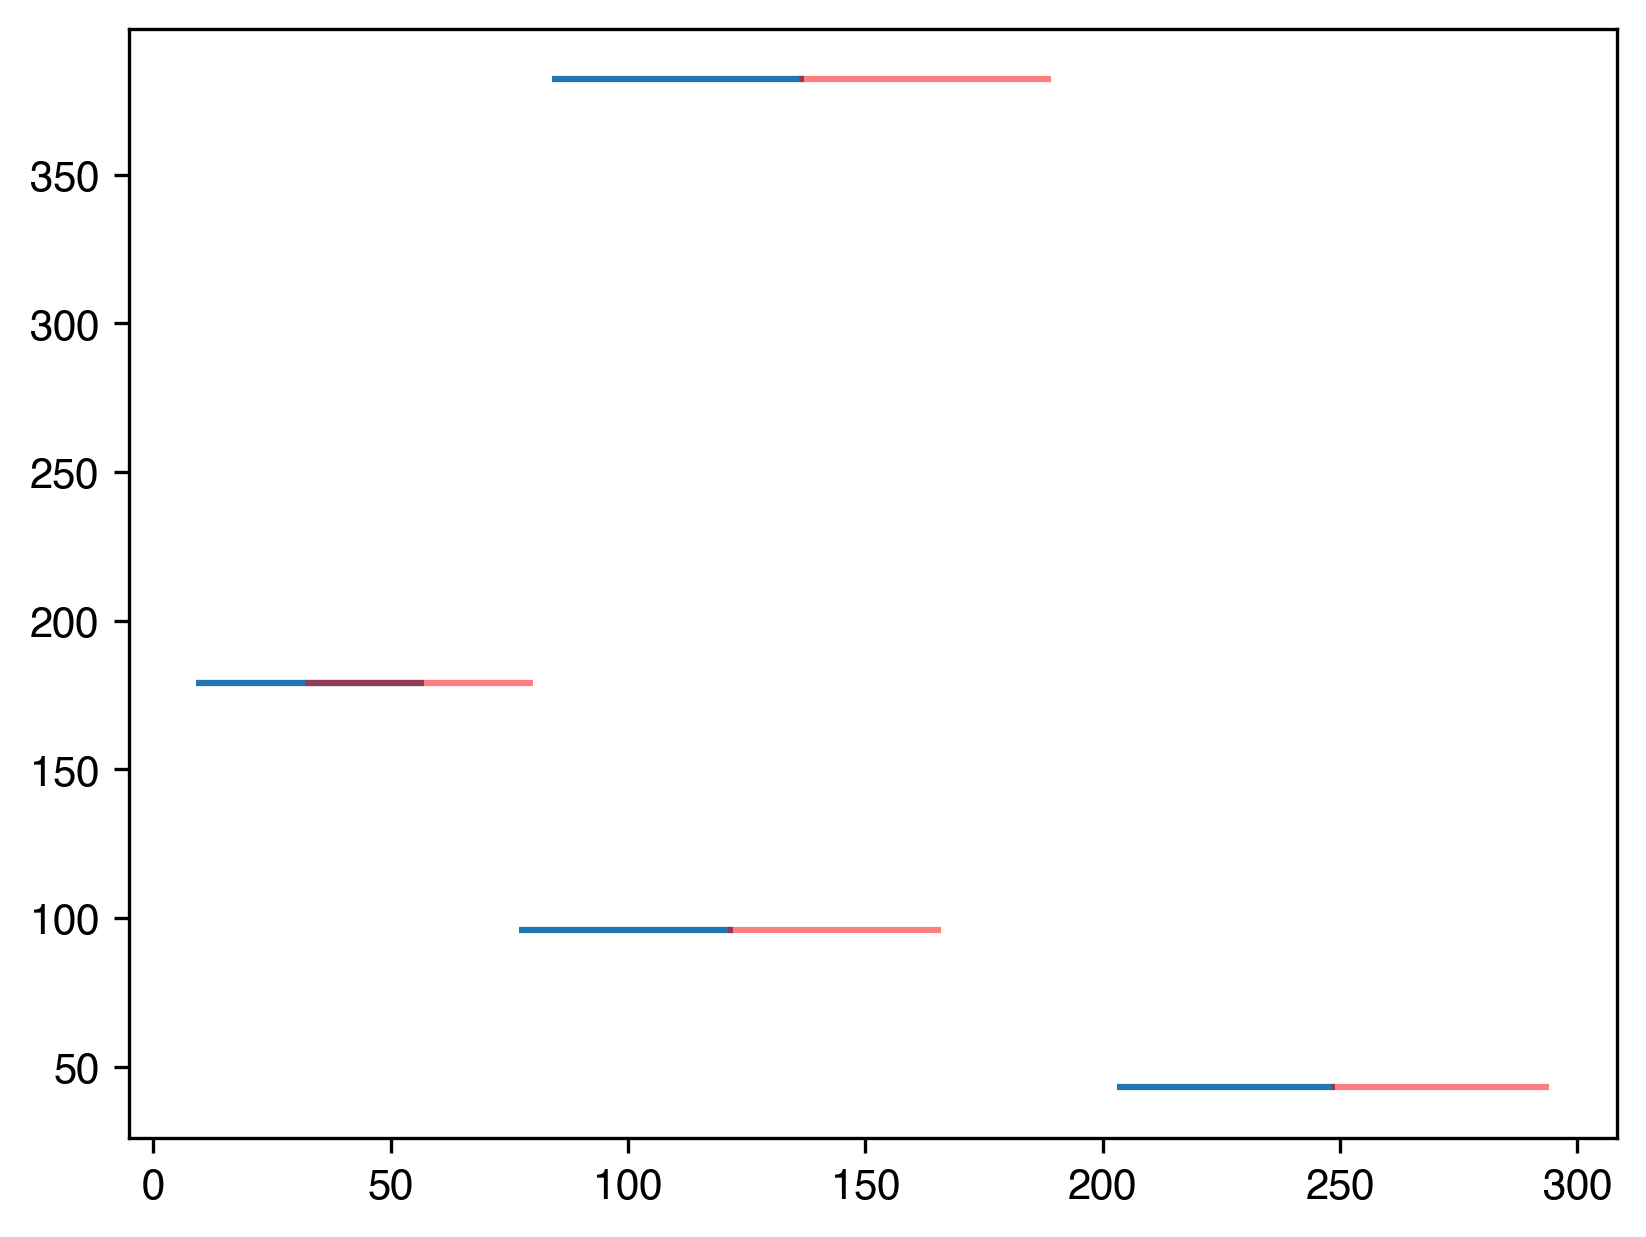

In [16]:
# Only for four seqs (out of 502) have overlaps between regions and only one is significant
for i in merged_seqs.index:
    AD_start = max(0, (merged_seqs.loc[i, 'WxxLF_loc']- int(merged_seqs.loc[i, "DBD_len"]-15)))
    AD_end = merged_seqs.loc[i, 'WxxLF_loc'] + 15
    upstream_start = (merged_seqs.loc[i, 'start']-merged_seqs.loc[i, "DBD_len"])
    upstream_end = (merged_seqs.loc[i, 'start'])
    
    if AD_end > upstream_start:

        plt.hlines(i, AD_start, AD_end)
        plt.hlines(i, upstream_start, upstream_end, color="red", alpha=0.5)


In [17]:
merged_seqs[merged_seqs['name'] == 'Saccharomycotina_sp|P03069|GCN4_YEAST']['Upstream_DBD_region'].values

array(['AKLTQTRKVKKPNSVVKKSHHVGKDDESRLDHLGVVAYNRKQRSIPLSPIVPESS'],
      dtype=object)

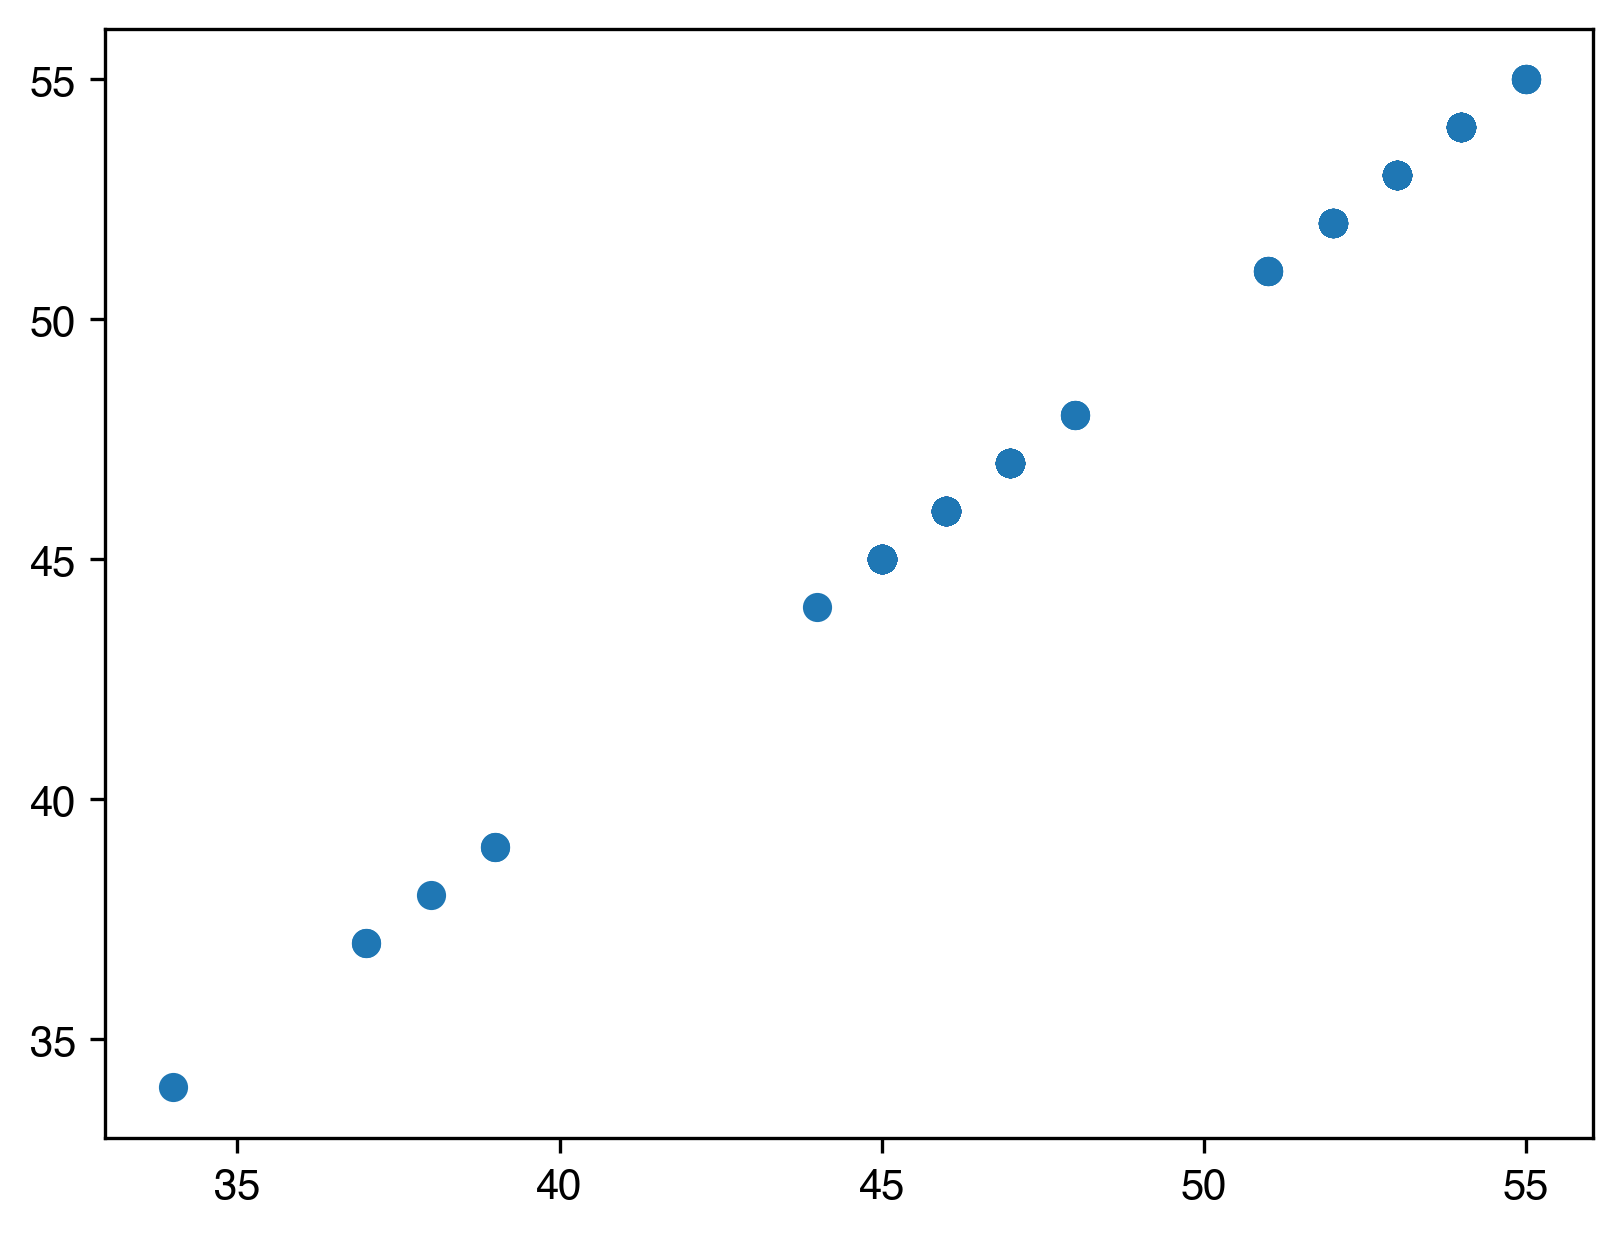

In [18]:
# Checking that the length matches
plt.scatter(merged_seqs["DBD_len"], merged_seqs["Central_regions"].str.len())

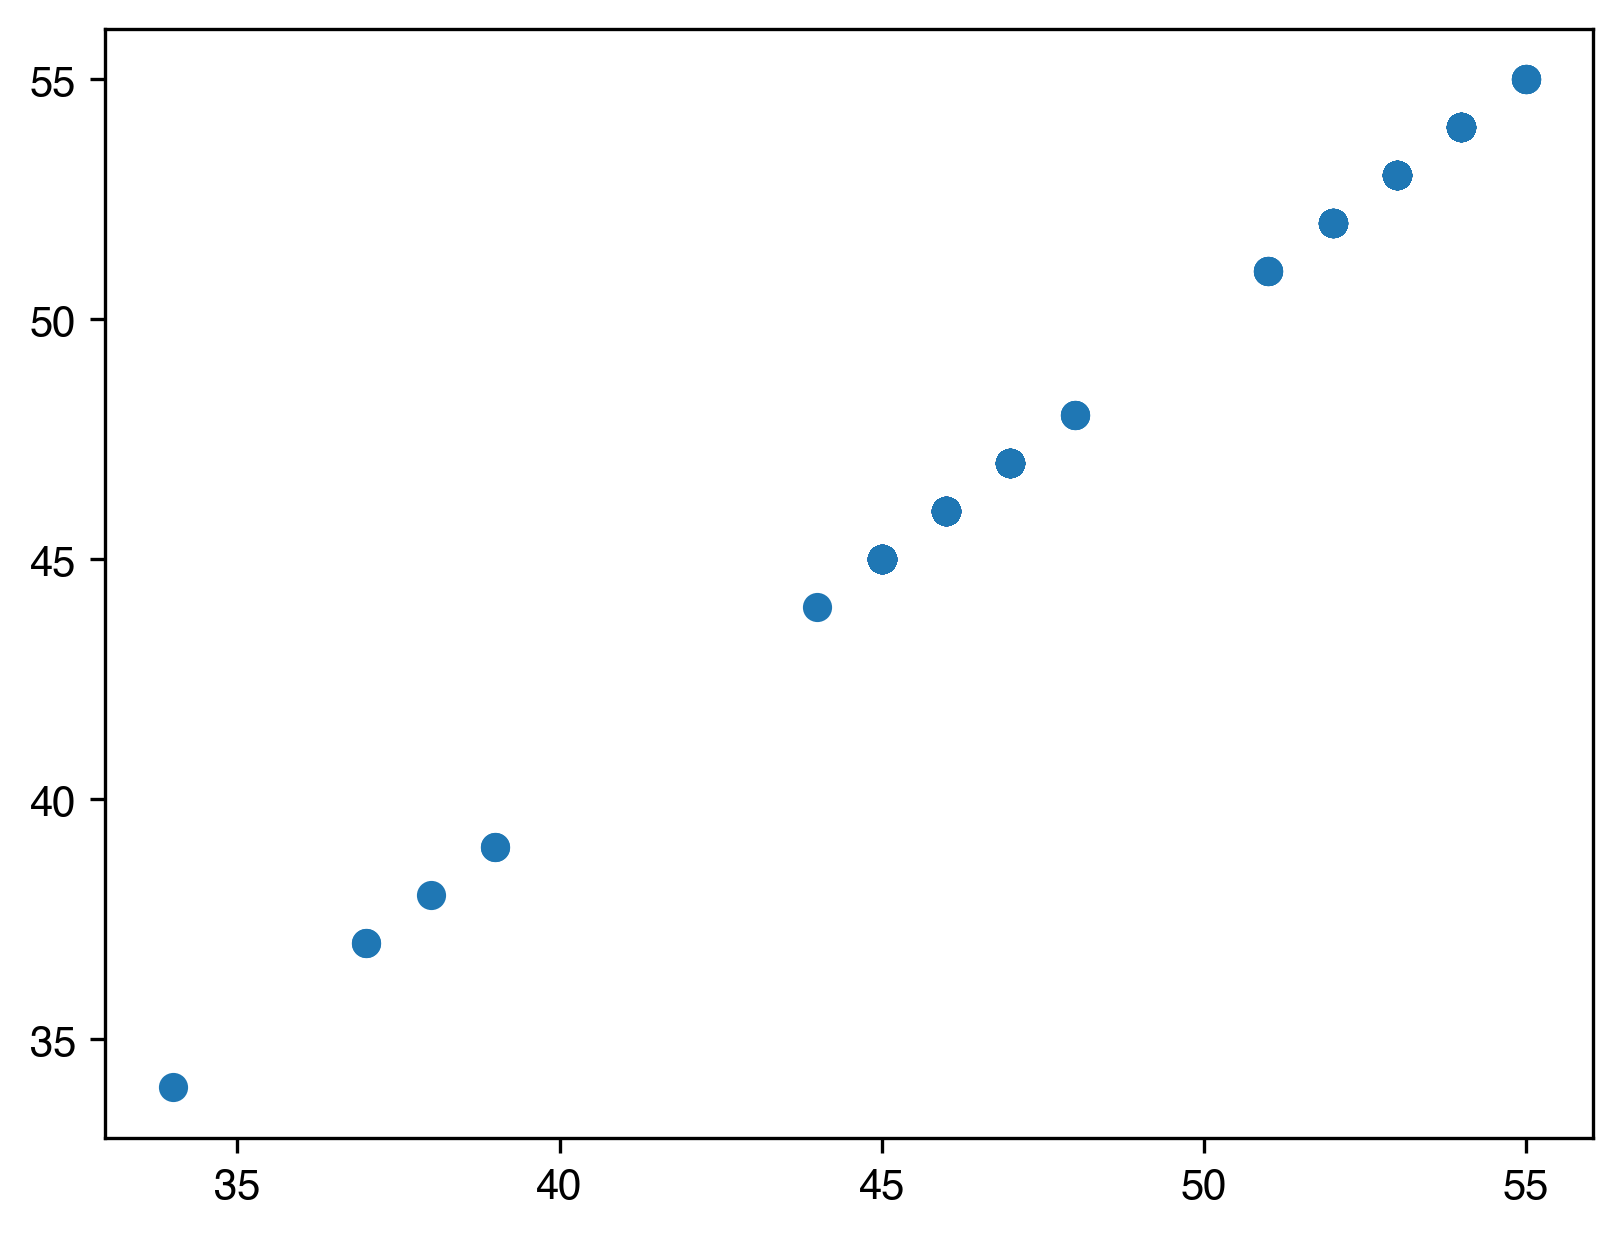

In [19]:
# Checking that the length matches
plt.scatter(merged_seqs["DBD_len"], merged_seqs["Upstream_DBD_region"].str.len())

# Perform pairwise alignments of the full sequence, the DBD and the IDR

In [20]:
from Bio import Align
from Bio.Align import substitution_matrices
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import numpy as np

matrix = substitution_matrices.load("BLOSUM45")

In [21]:
# Including gaps in percent identity calculation
def percent_identity(alignment):
    align1, align2 = list(alignment[0])
    matches = 0
    for aa1, aa2 in zip(align1, align2):
        if aa1 == aa2:
            matches += 1
    return matches / len(align2)

def align_two_seqs(seq1, seq2):
    aligner = Align.PairwiseAligner(scoring='blastp')
    aligner.mode = 'global'

    alignments = aligner.align(seq1, seq2)
    identity = percent_identity(alignments)

    return alignments.score, identity

In [22]:
full_seqs = merged_seqs['Seq'].values

full_seq_scores = np.zeros((len(full_seqs), len(full_seqs)))
full_seq_identity = np.zeros((len(full_seqs), len(full_seqs)))

for i in tqdm(range(len(full_seqs)-1)):
    for j in range(i+1, len(full_seqs)):
        score, identity = align_two_seqs(full_seqs[i], full_seqs[j])
        
        full_seq_scores[i, j] = score
        full_seq_scores[j, i] = score

        full_seq_identity[i, j] = identity
        full_seq_identity[j, i] = identity


  9%|▉         | 46/501 [00:47<07:46,  1.03s/it]


KeyboardInterrupt: 

In [ ]:
DBD_seqs = merged_seqs['DBD'].values

DBD_scores = np.zeros((len(full_seqs), len(full_seqs)))
DBD_identity = np.zeros((len(full_seqs), len(full_seqs)))

for i in tqdm(range(len(DBD_seqs)-1)):
    for j in range(i+1, len(DBD_seqs)):
        score, identity = align_two_seqs(DBD_seqs[i], DBD_seqs[j])

        DBD_scores[i, j] = score
        DBD_scores[j, i] = score

        DBD_identity[i, j] = identity
        DBD_identity[j, i] = identity


100%|██████████| 501/501 [00:48<00:00, 10.39it/s]


In [ ]:
IDR_seqs = merged_seqs['IDR'].values

IDR_scores = np.zeros((len(full_seqs), len(full_seqs)))
IDR_identity = np.zeros((len(full_seqs), len(full_seqs)))

for i in tqdm(range(len(IDR_seqs)-1)):
    for j in range(i+1, len(IDR_seqs)):
        score, identity = align_two_seqs(IDR_seqs[i], IDR_seqs[j])
        IDR_scores[i, j] = score
        IDR_scores[j, i] = score

        IDR_identity[i, j] = identity
        IDR_identity[j, i] = identity

100%|██████████| 501/501 [03:07<00:00,  2.68it/s]


In [ ]:
central_seqs = merged_seqs['Central_regions'].values

central_scores = np.zeros((len(full_seqs), len(full_seqs)))
central_identity = np.zeros((len(full_seqs), len(full_seqs)))

for i in tqdm(range(len(central_seqs)-1)):
    for j in range(i+1, len(central_seqs)):
        score, identity = align_two_seqs(central_seqs[i], central_seqs[j])
        central_scores[i, j] = score
        central_scores[j, i] = score

        central_identity[i, j] = identity
        central_identity[j, i] = identity

100%|██████████| 501/501 [00:49<00:00, 10.20it/s]


In [ ]:
upstream_seqs = merged_seqs['Upstream_DBD_region'].values

upstream_scores = np.zeros((len(full_seqs), len(full_seqs)))
upstream_identity = np.zeros((len(full_seqs), len(full_seqs)))

for i in tqdm(range(len(upstream_seqs)-1)):
    for j in range(i+1, len(upstream_seqs)):
        score, identity = align_two_seqs(upstream_seqs[i], upstream_seqs[j])
        upstream_scores[i, j] = score
        upstream_scores[j, i] = score

        upstream_identity[i, j] = identity
        upstream_identity[j, i] = identity

100%|██████████| 501/501 [00:49<00:00, 10.14it/s]


In [ ]:
full_seq_scores_list = []

def make_array_list(arr):
    ls = []

    for i in tqdm(range(len(arr)-1)):
        for j in range(i+1, len(arr)):
            ls.append(arr[i, j])

    return ls

100%|██████████| 501/501 [00:00<00:00, 54832.51it/s]
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


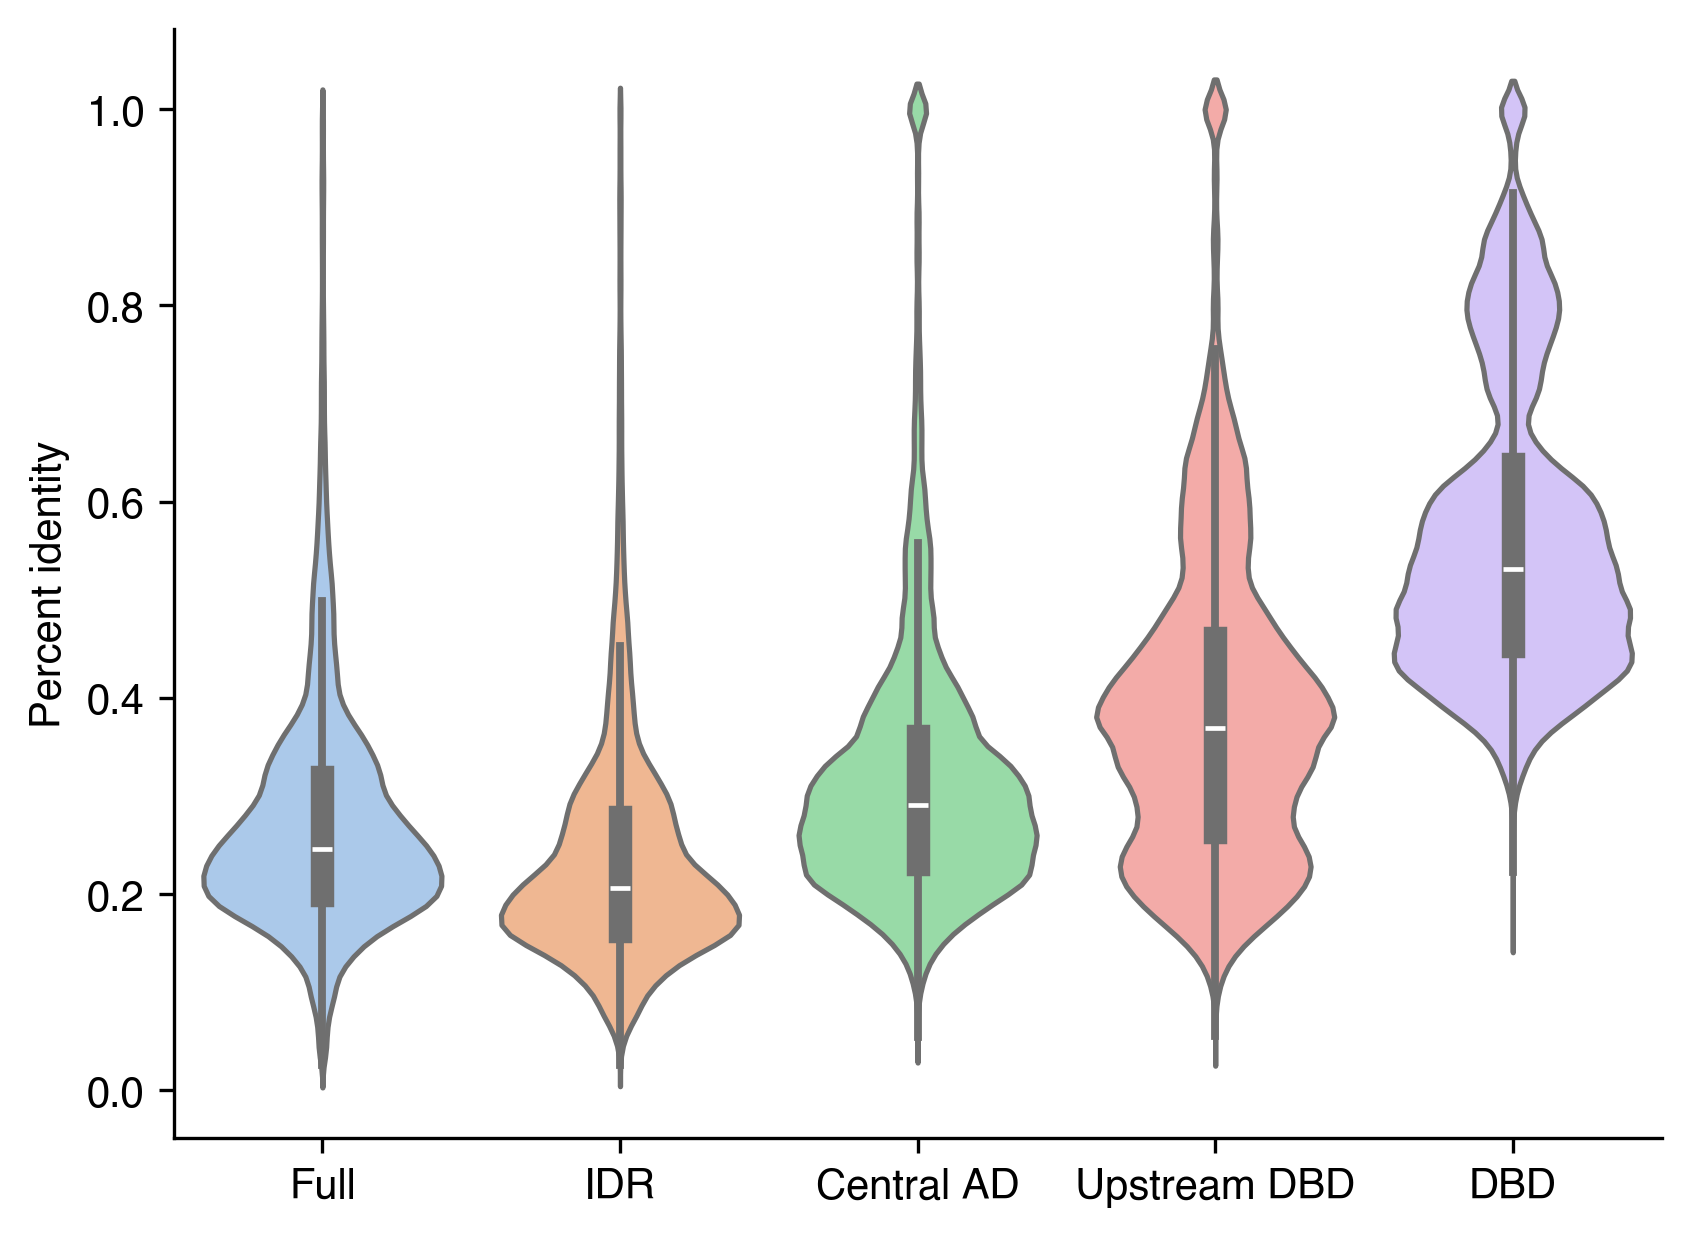

In [ ]:
DBD_ls = make_array_list(DBD_identity)
full_ls = make_array_list(full_seq_identity)
IDR_ls = make_array_list(IDR_identity)
central_ls = make_array_list(central_identity)
upstream_ls = make_array_list(upstream_identity)

sns.set_palette("pastel") 
sns.violinplot([full_ls, IDR_ls, central_ls, upstream_ls, DBD_ls])


plt.xticks(ticks=[0, 1, 2, 3, 4], labels = ["Full", "IDR", "Central AD", "Upstream DBD", "DBD"])
plt.ylabel("Percent identity")

sns.despine()

plt.savefig("../figures/conservation_plots/conservation_violin.pdf", format='pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


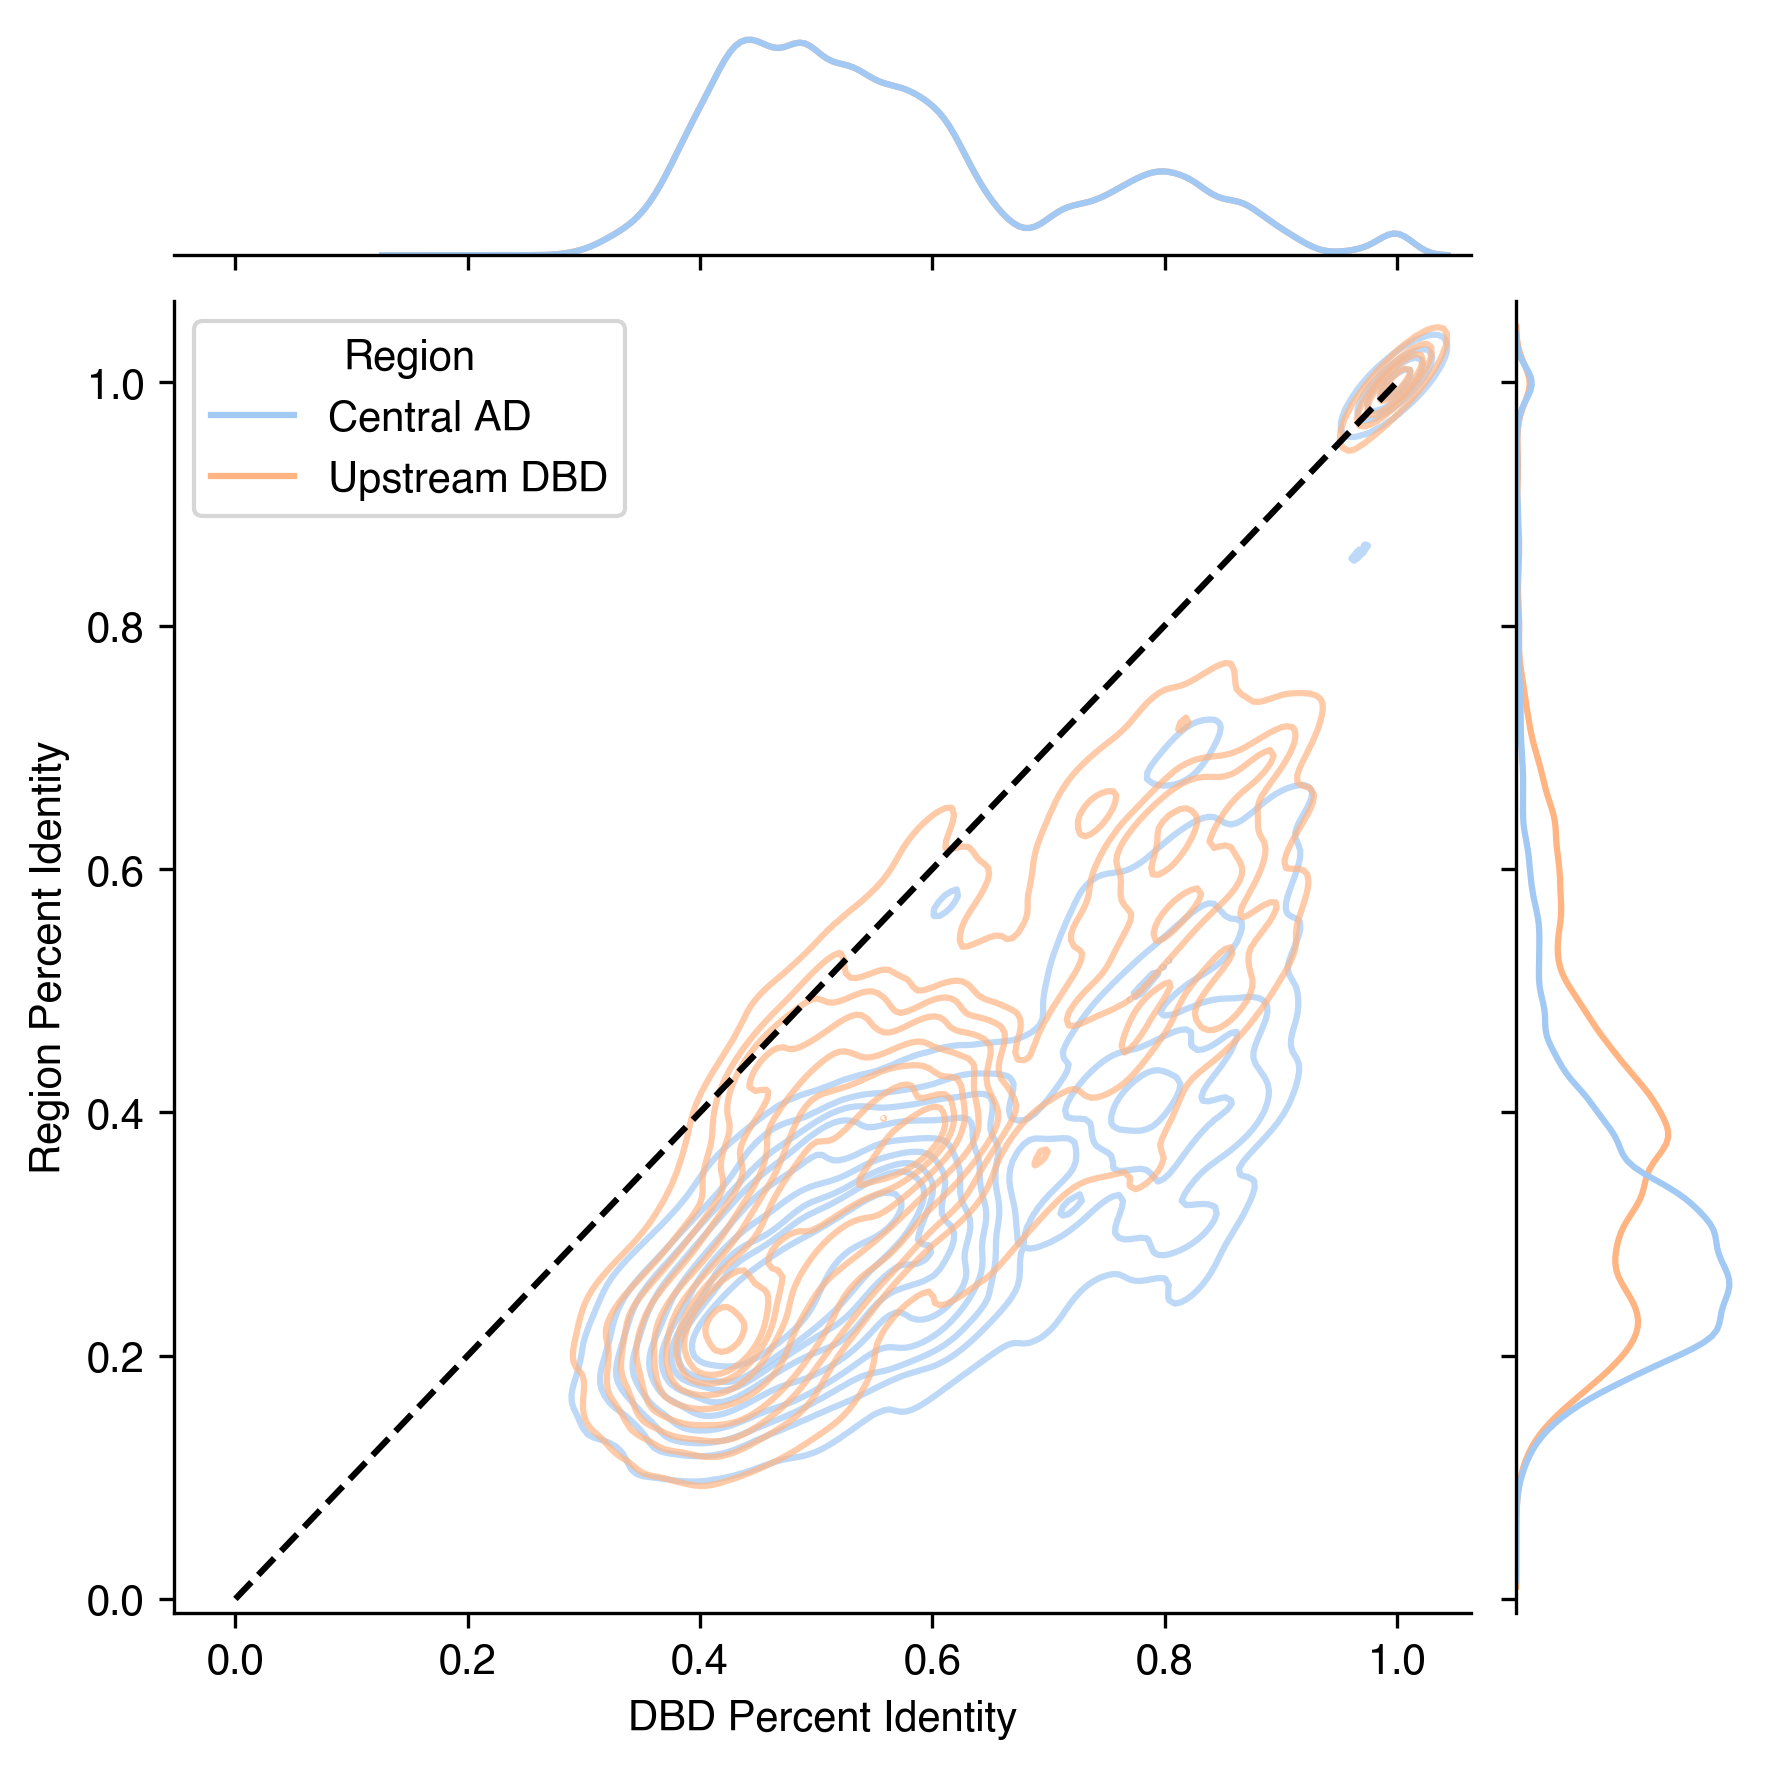

In [50]:
plotting_df = pd.concat([pd.DataFrame({"DBD Percent Identity" : DBD_ls, "Region Percent Identity" : central_ls, "Region" : "Central AD"}), pd.DataFrame({"DBD Percent Identity" : DBD_ls, "Region Percent Identity" : upstream_ls, "Region" : "Upstream DBD"})])

g = sns.jointplot(data = plotting_df, x="DBD Percent Identity", y="Region Percent Identity",
              kind="kde",
              hue="Region", alpha=0.7)
sns.move_legend(g.ax_joint, "upper left")

plt.plot([0,1], [0,1], linestyle="--", color="black")
plt.savefig("../figures/conservation_plots/percent_identity_density.pdf", format='pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


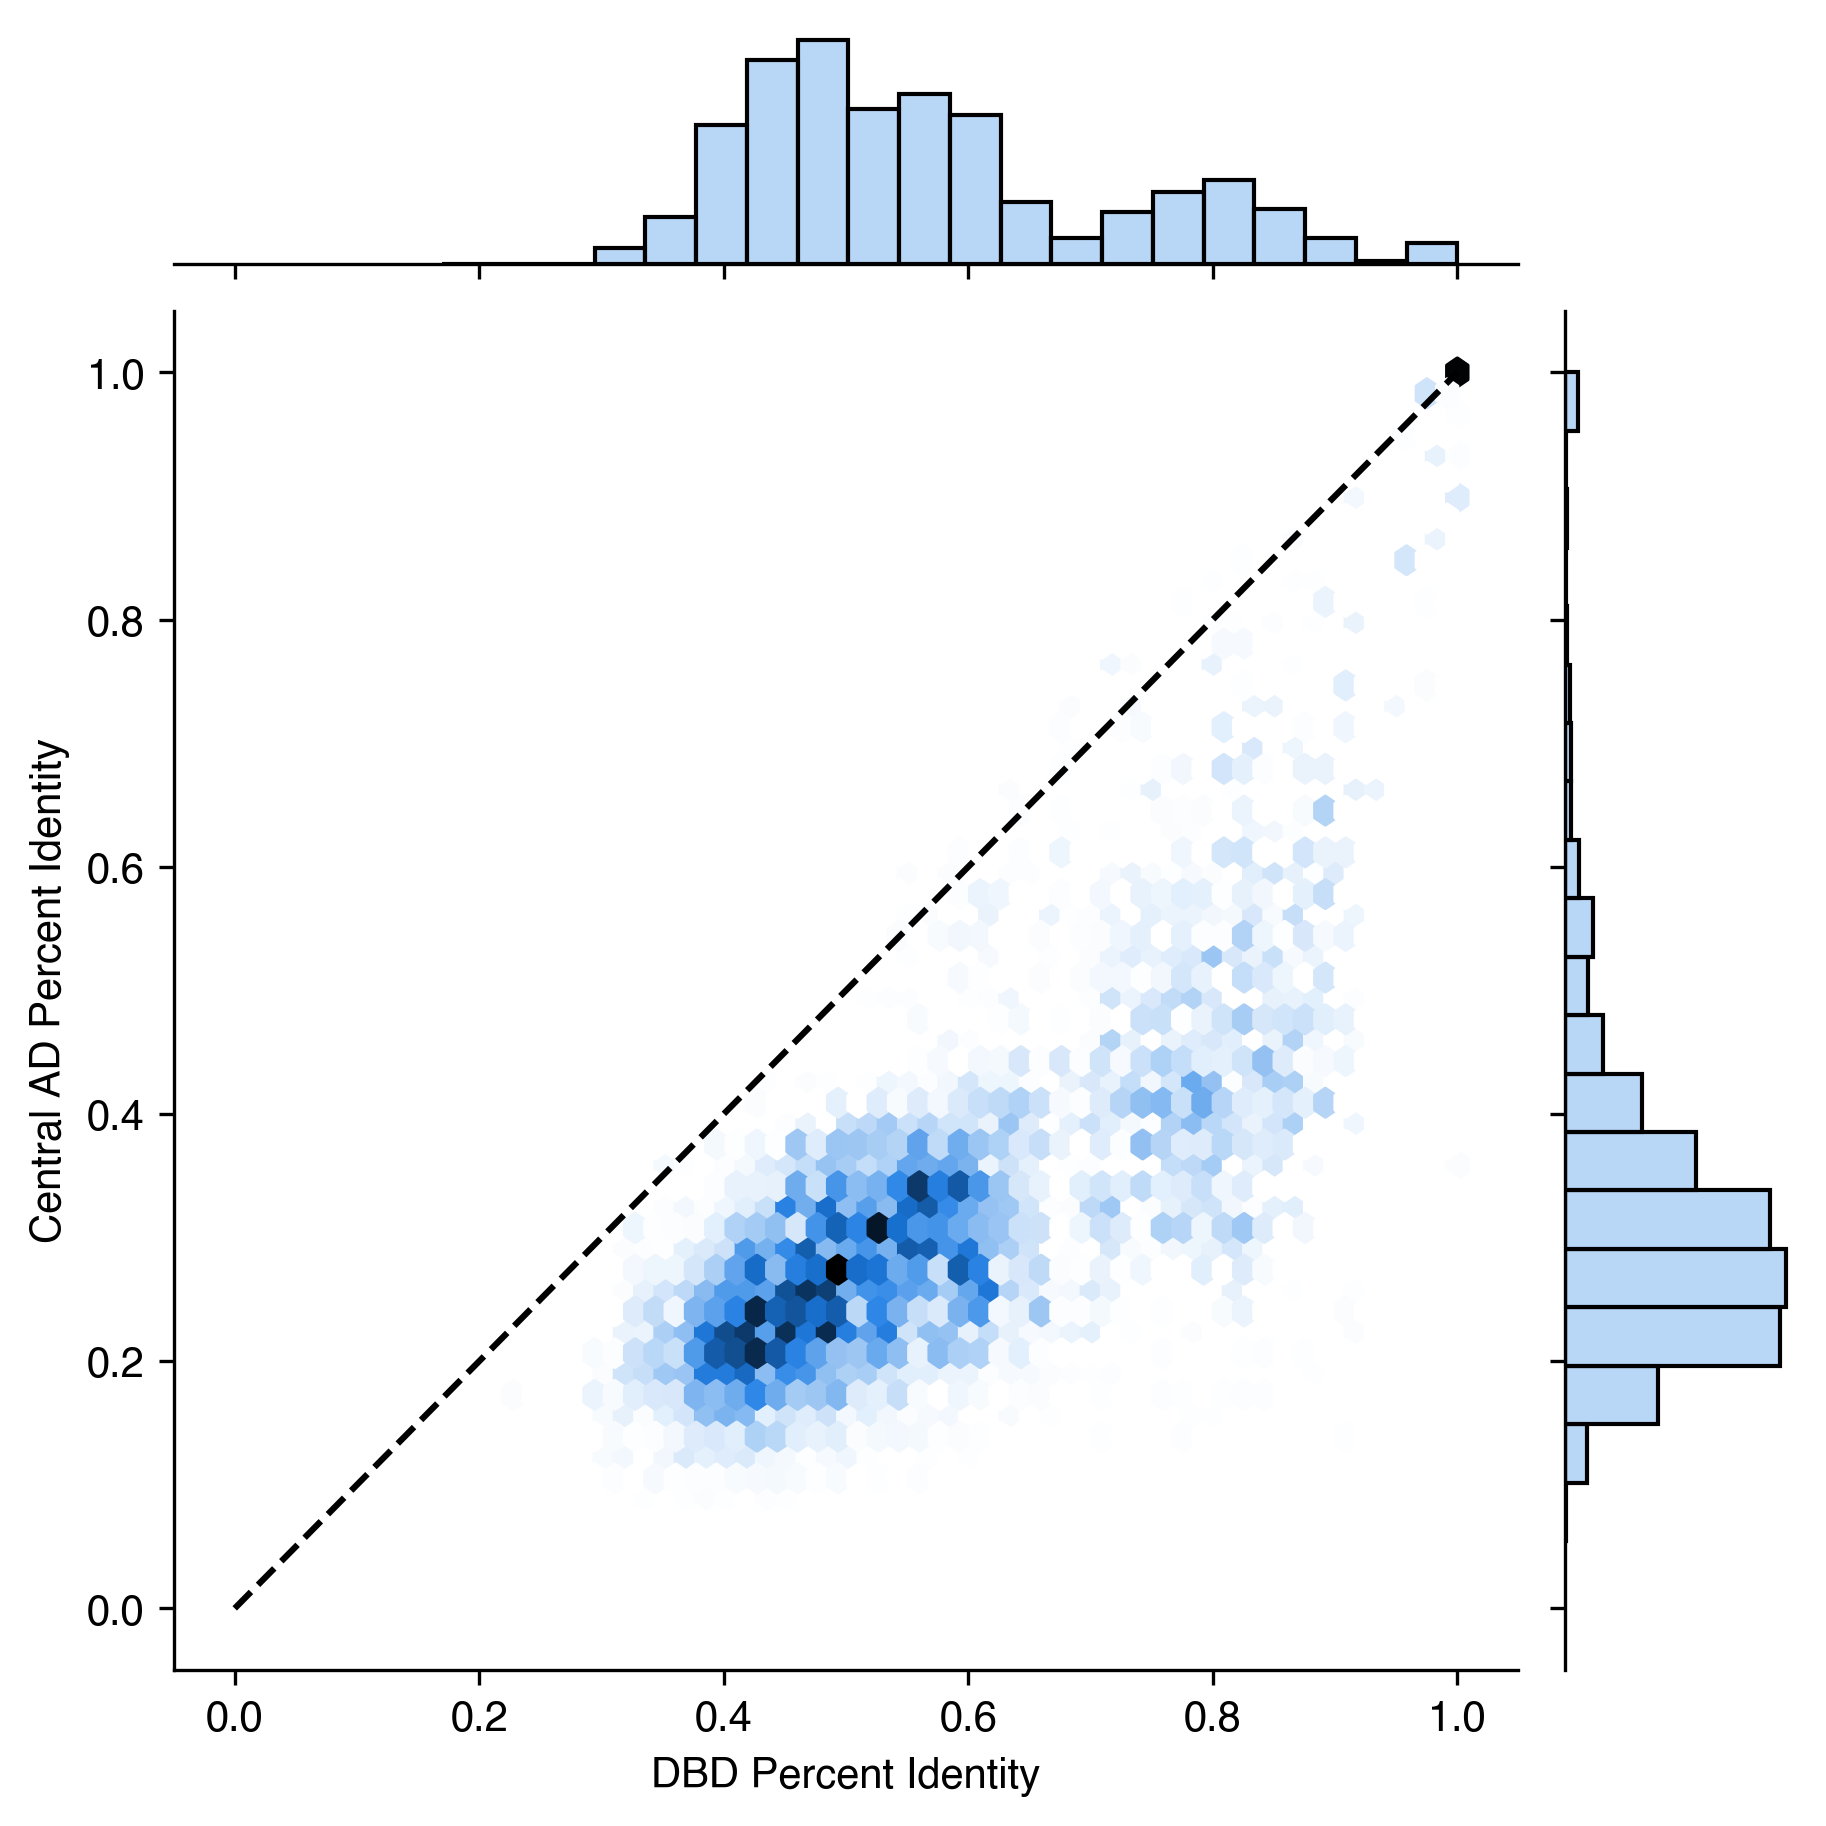

In [51]:
# fig, axs = plt.subplots(1, 2, figsize=(10,3))

sns.jointplot(x=DBD_ls, y=central_ls, kind="hex",   marginal_kws=dict(bins=20))
plt.plot([0,1], [0,1], linestyle="--", color="black")
plt.xlabel("DBD Percent Identity")
plt.ylabel("Central AD Percent Identity")
plt.savefig("../figures/conservation_plots/central_DBD_scatter.pdf", format='pdf', bbox_inches='tight')
# axs[0].plot([0,1], [0,1], linestyle="--", color="black")

# axs[1].scatter(DBD_ls, upstream_ls, alpha=0.3, s=8)
# axs[1].plot([0,1], [0,1], linestyle="--", color="black")

# axs[0].set_xlabel("DBD percent identity")
# axs[0].set_ylabel("Central AD percent identity")

# axs[1].set_xlabel("DBD percent identity")
# axs[1].set_ylabel("Upstream DBD percent identity")

# sns.despine()


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


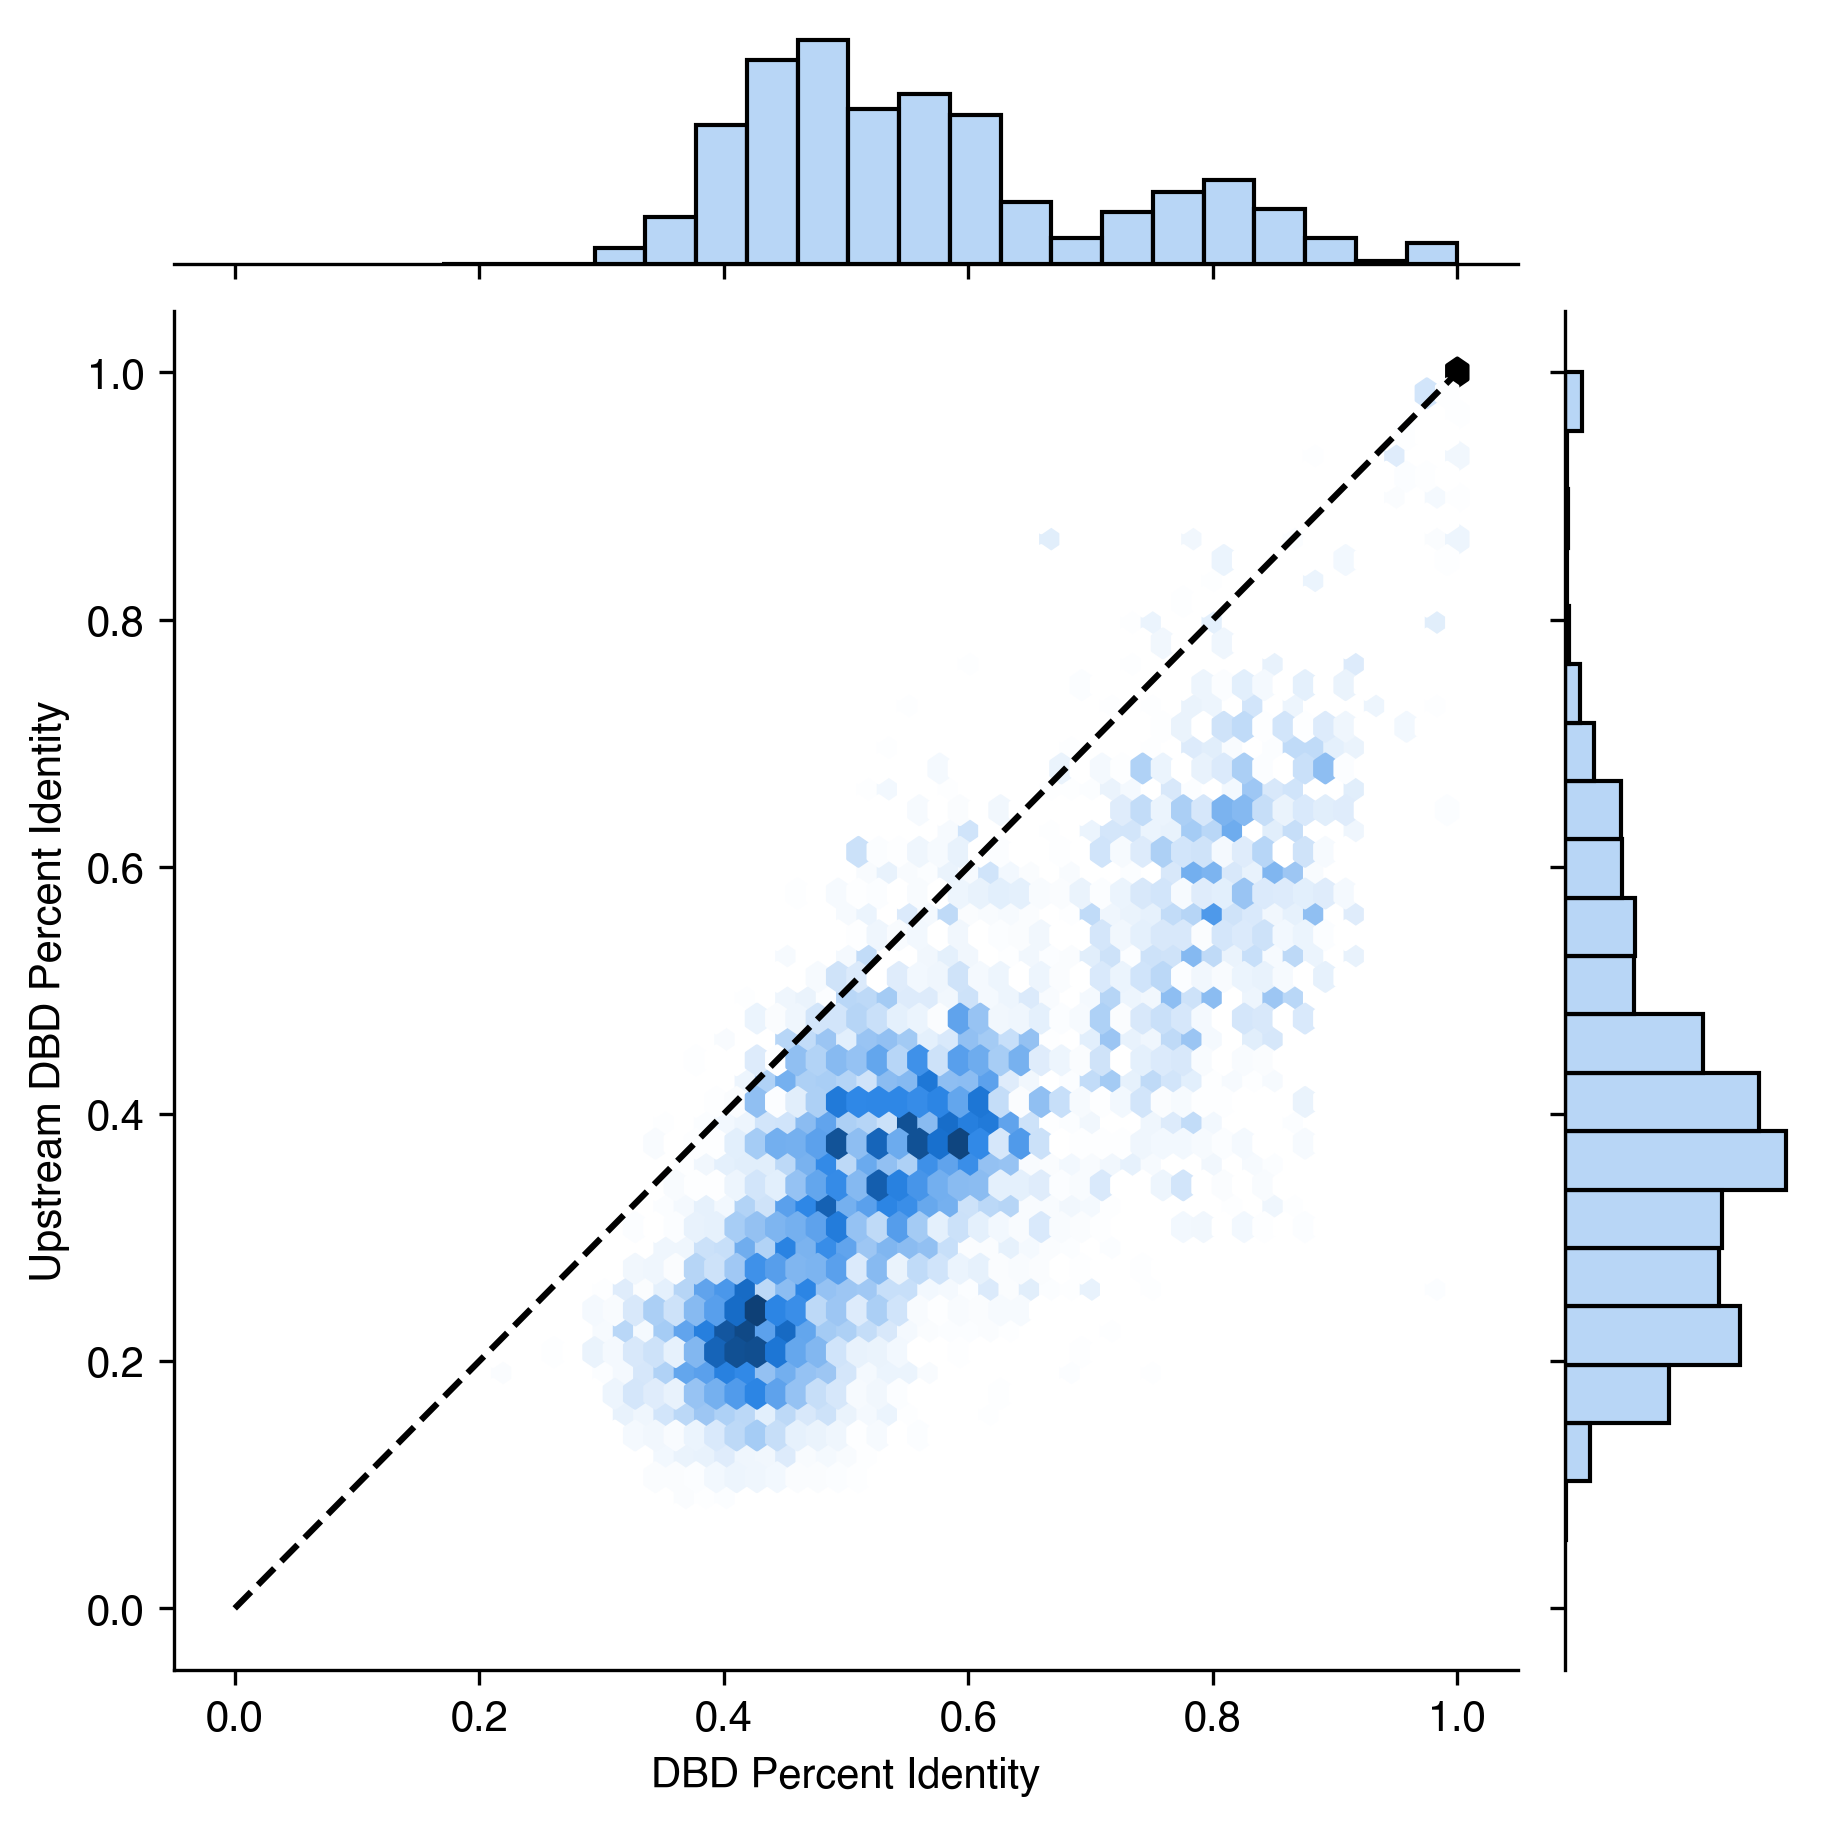

In [52]:
sns.jointplot(x=DBD_ls, y=upstream_ls, kind="hex",   marginal_kws=dict(bins=20))
plt.plot([0,1], [0,1], linestyle="--", color="black")

plt.xlabel("DBD Percent Identity")
plt.ylabel("Upstream DBD Percent Identity")
plt.savefig("../figures/conservation_plots/upstream_DBD_scatter.pdf", format='pdf', bbox_inches='tight')

100%|██████████| 501/501 [00:00<00:00, 67301.23it/s]
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


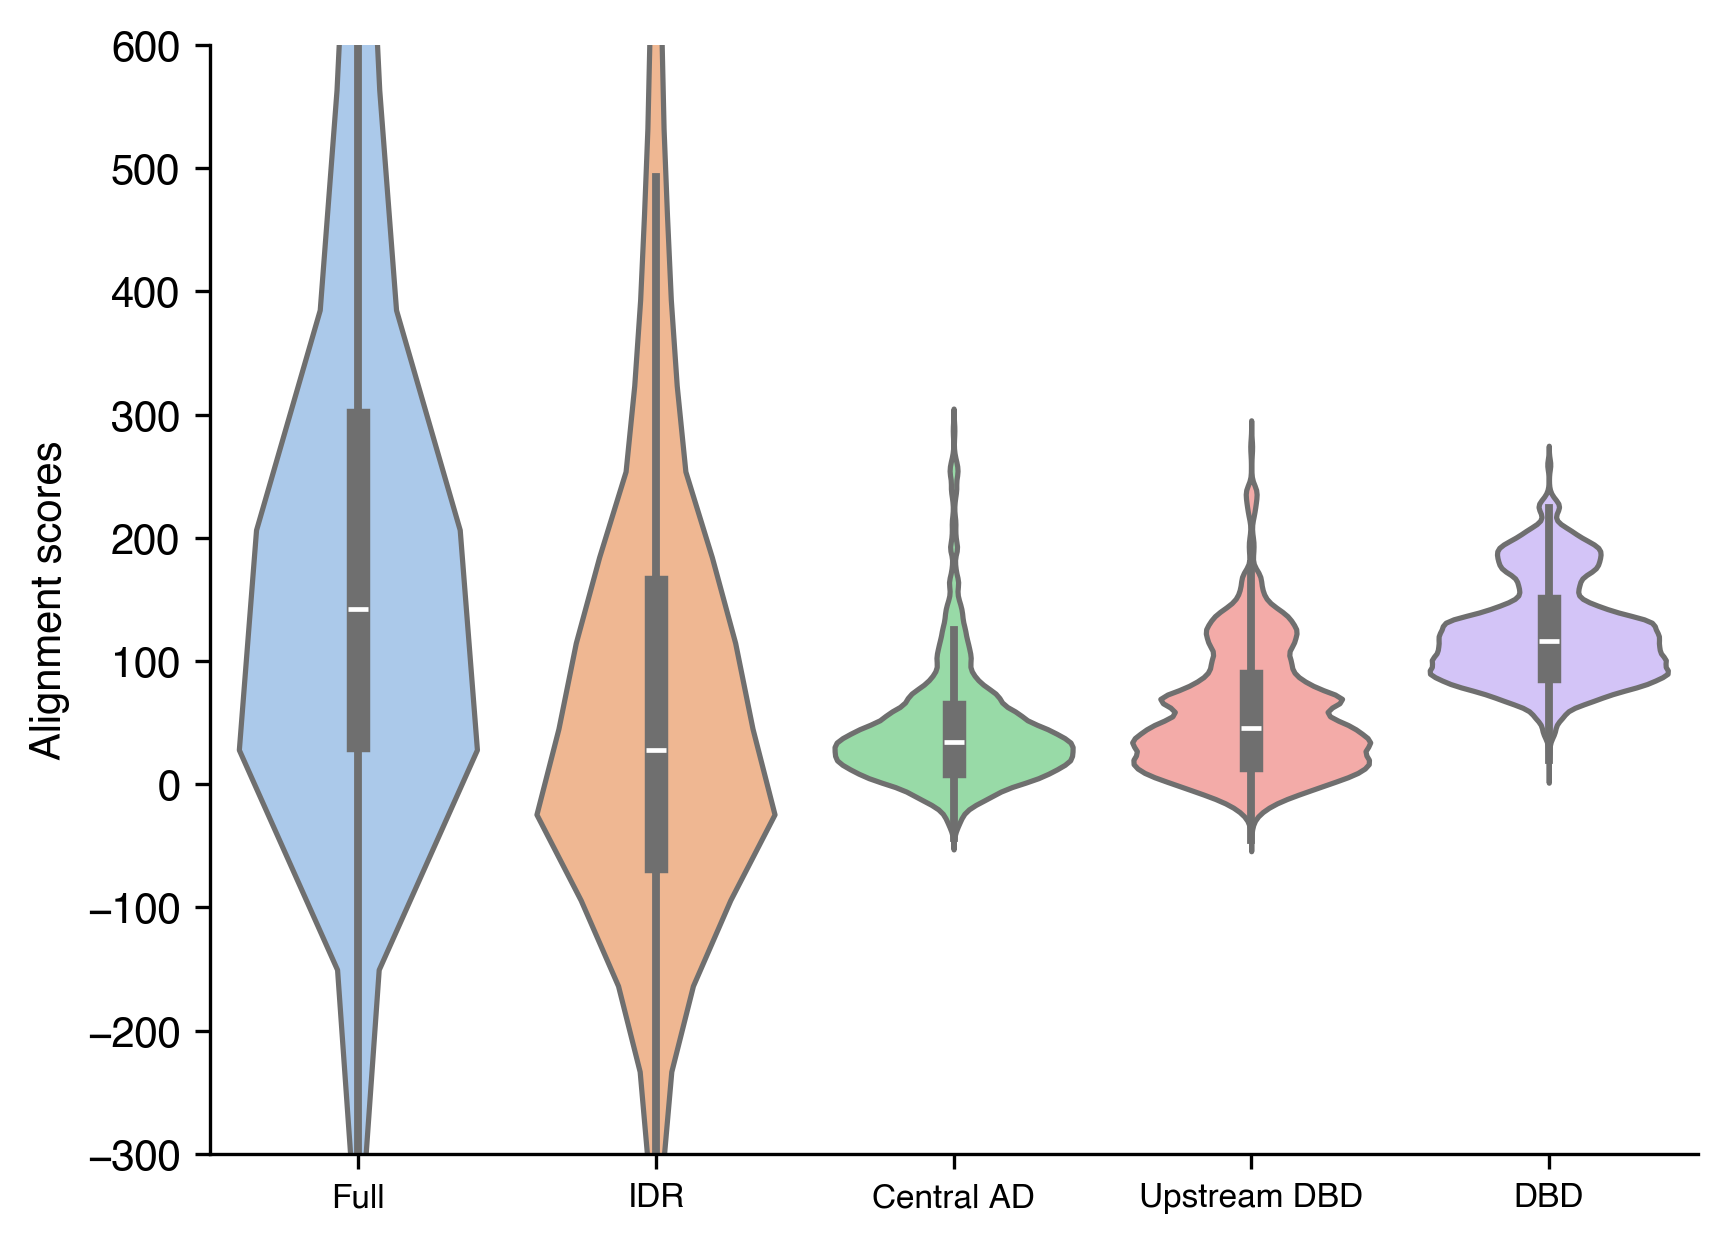

In [53]:
DBD_ls = make_array_list(DBD_scores)
full_ls = make_array_list(full_seq_scores)
IDR_ls = make_array_list(IDR_scores)
central_ls = make_array_list(central_scores)
upstream_ls = make_array_list(upstream_scores)

sns.violinplot([full_ls, IDR_ls,  central_ls, upstream_ls, DBD_ls])

plt.xticks(ticks=[0, 1, 2, 3, 4], labels = ["Full", "IDR",  "Central AD", "Upstream DBD", "DBD"], fontsize=8)
plt.ylabel("Alignment scores")

plt.ylim(-300, 600)
sns.despine()

plt.savefig("../figures/conservation_plots/alignment_scores.pdf", format='pdf', bbox_inches='tight')

# Shuffles

In [54]:
# Think about shuffles
import random

shuffle_scores_IDR = np.zeros((5, len(merged_seqs), len(merged_seqs)))
shuffle_identities_IDR = np.zeros((5, len(merged_seqs), len(merged_seqs)))

for b in range(5):
    # Shuffle every sequence
    shuffled_seqs = []
    for idx in tqdm(merged_seqs.index): 
        l = list(merged_seqs.loc[idx, 'IDR'])
        random.shuffle(l)
        result = ''.join(l)
        shuffled_seqs.append(result)

    for i in tqdm(range(len(shuffled_seqs)-1)):
        for j in range(i+1, len(shuffled_seqs)):
            score, identity = align_two_seqs(shuffled_seqs[i], shuffled_seqs[j])

            shuffle_scores_IDR[b, i, j] = score
            shuffle_scores_IDR[b, j, i] = score

            shuffle_identities_IDR[b, i, j] = identity
            shuffle_identities_IDR[b, j, i] = identity

100%|██████████| 501/501 [03:11<00:00,  2.61it/s]


100%|██████████| 501/501 [00:00<00:00, 37188.02it/s]
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


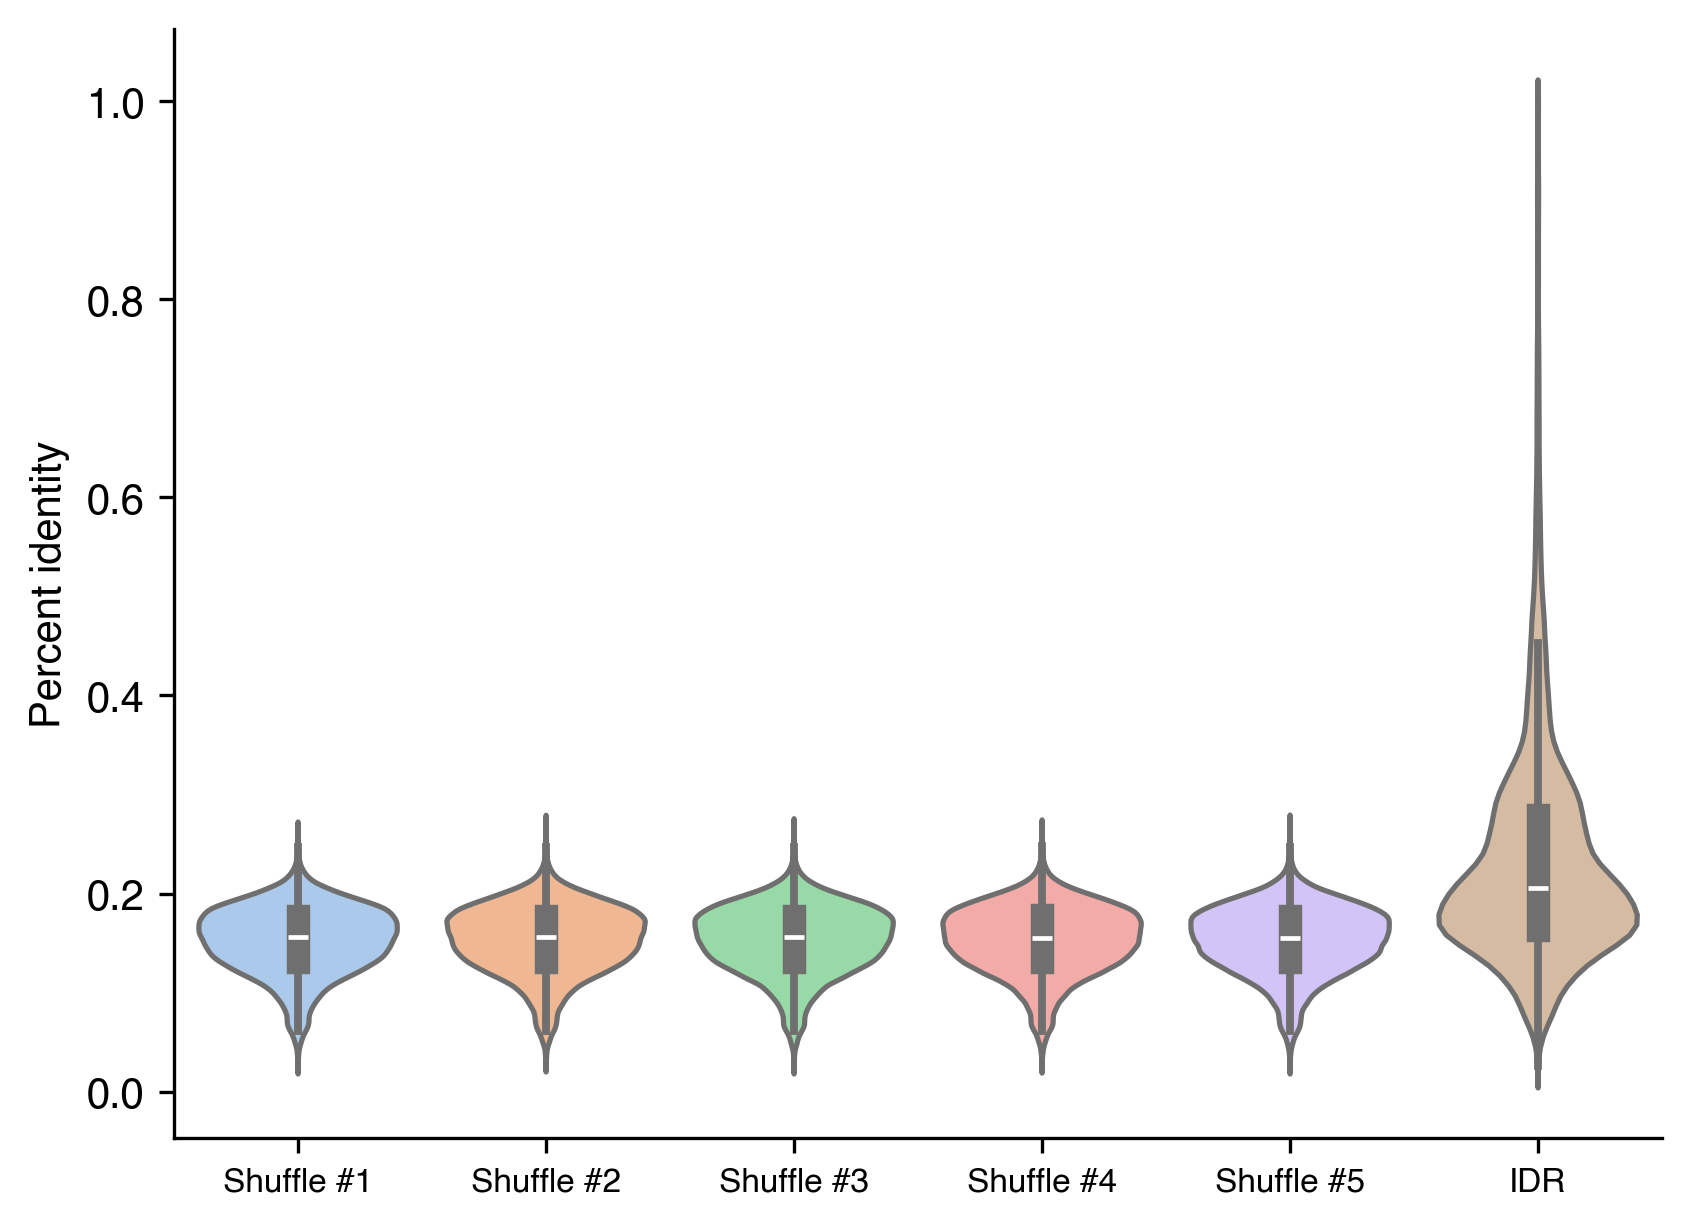

In [55]:
shuffle_1 = make_array_list(shuffle_identities_IDR[0])
shuffle_2 = make_array_list(shuffle_identities_IDR[1])
shuffle_3 = make_array_list(shuffle_identities_IDR[2])
shuffle_4 = make_array_list(shuffle_identities_IDR[3])
shuffle_5 = make_array_list(shuffle_identities_IDR[4])

IDR_ls = make_array_list(IDR_identity)

sns.violinplot([shuffle_1, shuffle_2, shuffle_3, shuffle_4, shuffle_5, IDR_ls])



plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels = ["Shuffle #1", "Shuffle #2", "Shuffle #3",  "Shuffle #4", "Shuffle #5", "IDR"], fontsize=8)
plt.ylabel("Percent identity")

sns.despine()
plt.savefig("../figures/conservation_plots/IDR_shuffles.pdf", format='pdf', bbox_inches='tight')

In [56]:
# Think about shuffles
shuffle_scores_DBD = np.zeros((5, len(merged_seqs), len(merged_seqs)))
shuffle_identities_DBD = np.zeros((5, len(merged_seqs), len(merged_seqs)))

for b in range(5):
    # Shuffle every sequence
    shuffled_seqs = []
    for idx in tqdm(merged_seqs.index): 
        l = list(merged_seqs.loc[idx, 'DBD'])
        random.shuffle(l)
        result = ''.join(l)
        shuffled_seqs.append(result)

    for i in tqdm(range(len(shuffled_seqs)-1)):
        for j in range(i+1, len(shuffled_seqs)):
            score, identity = align_two_seqs(shuffled_seqs[i], shuffled_seqs[j])

            shuffle_scores_DBD[b, i, j] = score
            shuffle_scores_DBD[b, j, i] = score

            shuffle_identities_DBD[b, i, j] = identity
            shuffle_identities_DBD[b, j, i] = identity

100%|██████████| 501/501 [00:48<00:00, 10.23it/s]


100%|██████████| 405/405 [00:00<00:00, 87624.74it/s]
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


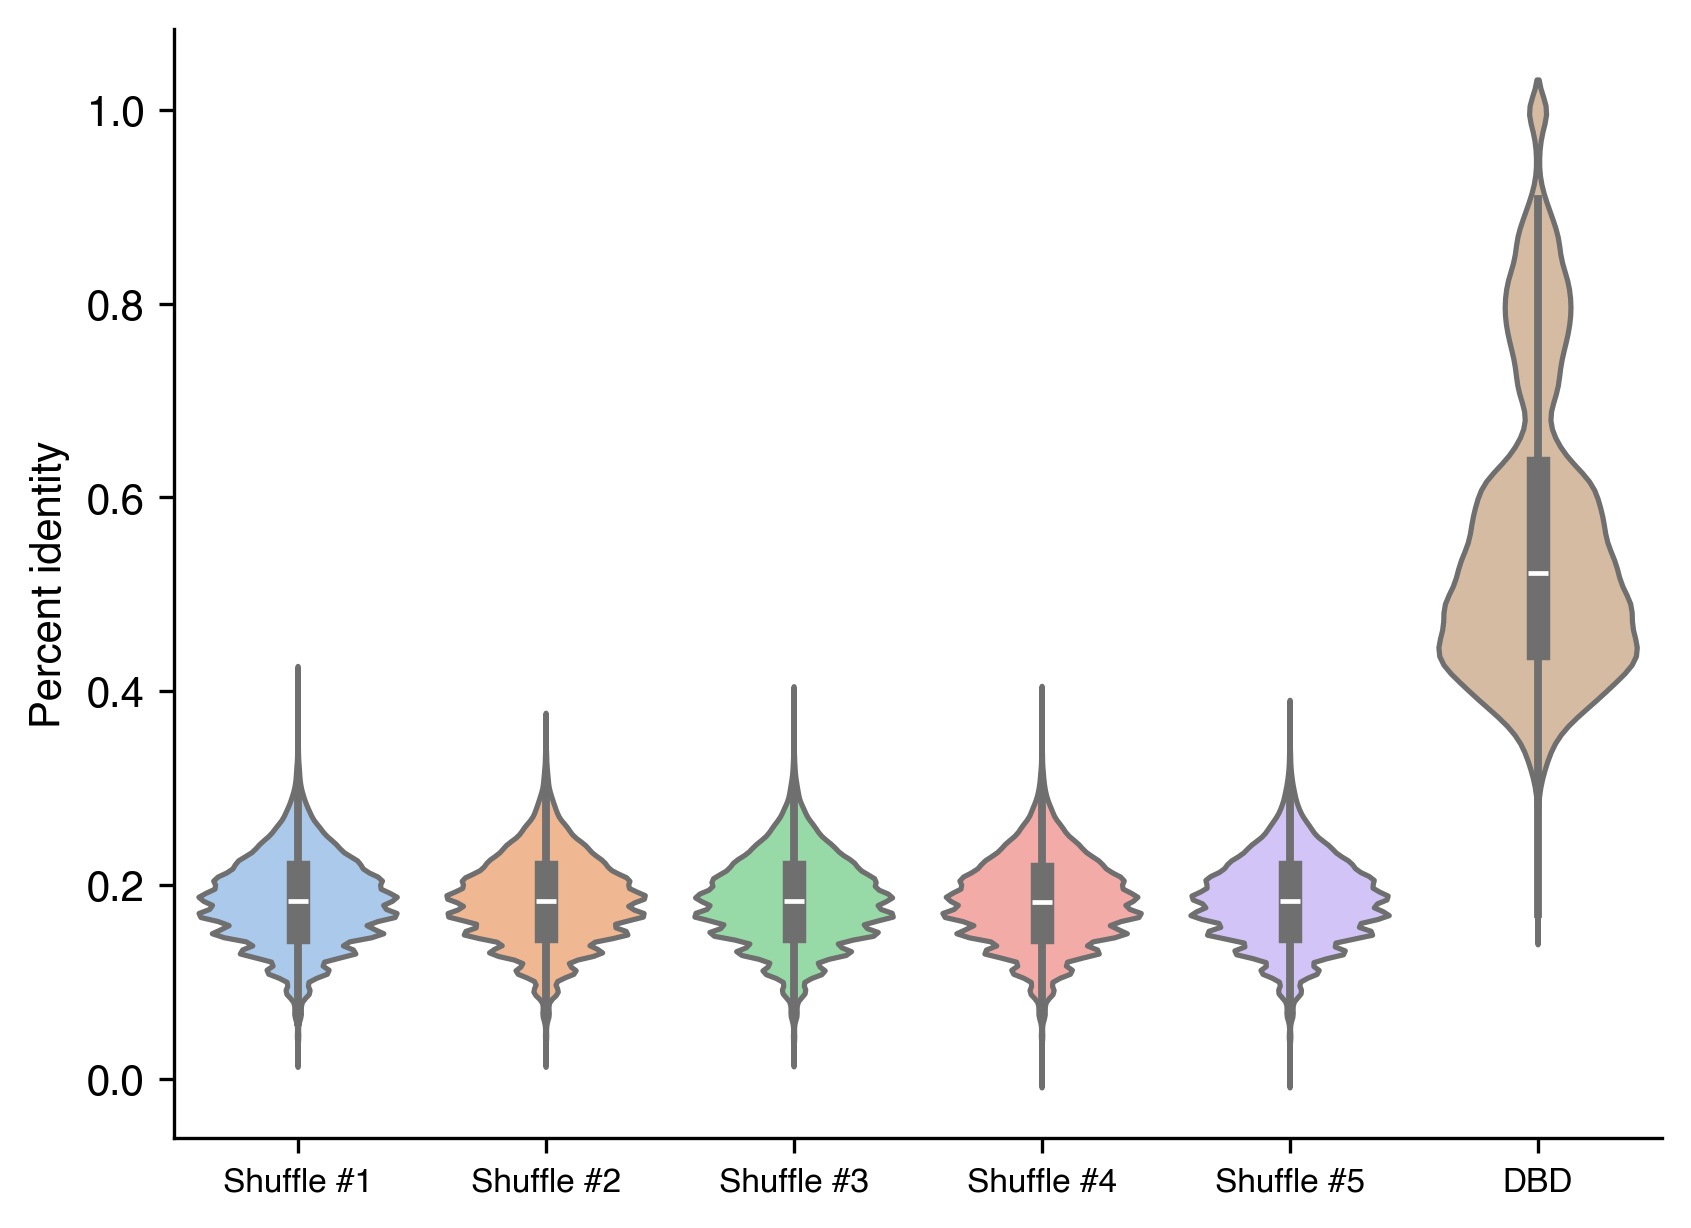

In [ ]:
shuffle_1 = make_array_list(shuffle_identities_DBD[0])
shuffle_2 = make_array_list(shuffle_identities_DBD[1])
shuffle_3 = make_array_list(shuffle_identities_DBD[2])
shuffle_4 = make_array_list(shuffle_identities_DBD[3])
shuffle_5 = make_array_list(shuffle_identities_DBD[4])

DBD_ls = make_array_list(DBD_identity)

sns.violinplot([shuffle_1, shuffle_2, shuffle_3, shuffle_4, shuffle_5, DBD_ls])

plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels = ["Shuffle #1", "Shuffle #2", "Shuffle #3",  "Shuffle #4", "Shuffle #5", "DBD"], fontsize=8)
plt.ylabel("Percent identity")

sns.despine()
plt.savefig("../figures/conservation_plots/DBD_shuffles.pdf", format='pdf', bbox_inches='tight')

In [57]:
# Think about shuffles
shuffle_scores_AD = np.zeros((5, len(merged_seqs), len(merged_seqs)))
shuffle_identities_AD = np.zeros((5, len(merged_seqs), len(merged_seqs)))

for b in range(5):
    # Shuffle every sequence
    shuffled_seqs = []
    for idx in tqdm(merged_seqs.index): 
        l = list(merged_seqs.loc[idx, 'Central_regions'])
        random.shuffle(l)
        result = ''.join(l)
        shuffled_seqs.append(result)

    for i in tqdm(range(len(shuffled_seqs)-1)):
        for j in range(i+1, len(shuffled_seqs)):
            score, identity = align_two_seqs(shuffled_seqs[i], shuffled_seqs[j])

            shuffle_scores_AD[b, i, j] = score
            shuffle_scores_AD[b, j, i] = score

            shuffle_identities_AD[b, i, j] = identity
            shuffle_identities_AD[b, j, i] = identity

100%|██████████| 501/501 [00:50<00:00,  9.95it/s]


100%|██████████| 501/501 [00:00<00:00, 69009.73it/s]
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


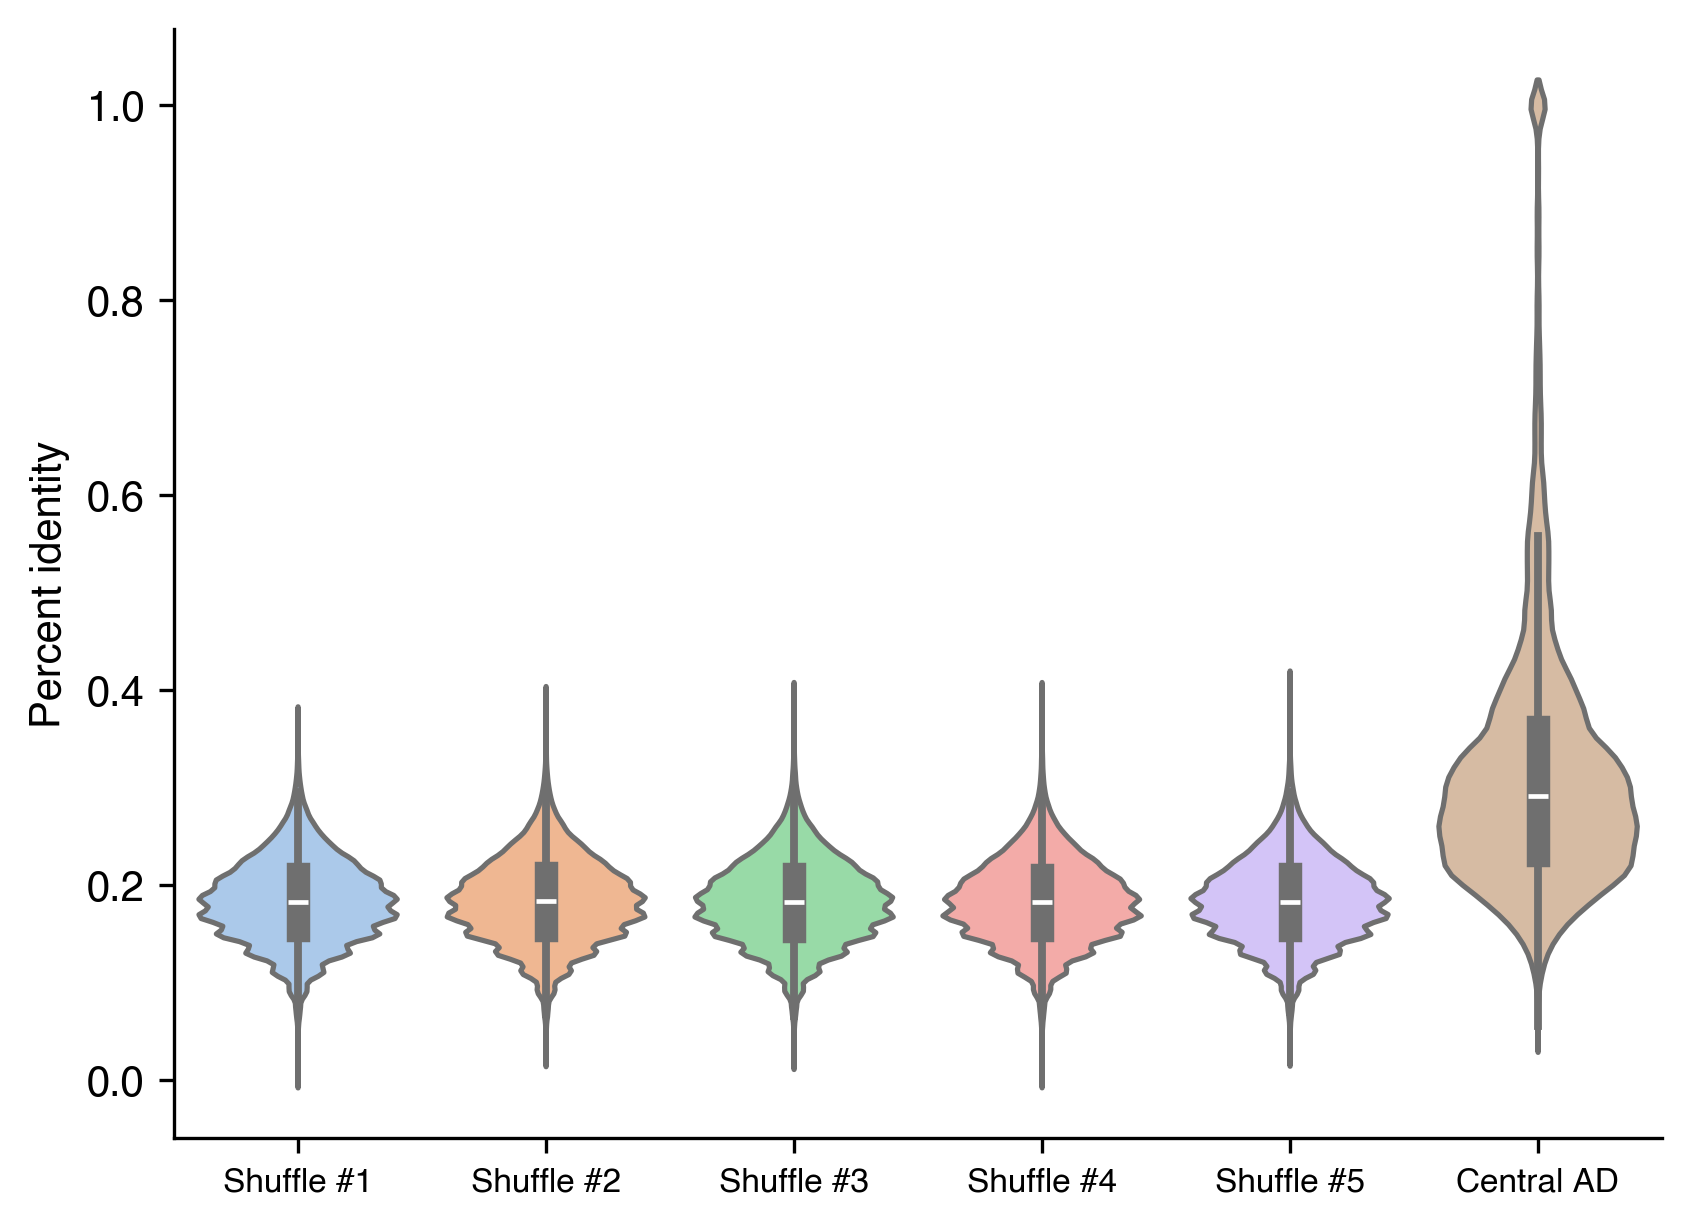

In [58]:
shuffle_1 = make_array_list(shuffle_identities_AD[0])
shuffle_2 = make_array_list(shuffle_identities_AD[1])
shuffle_3 = make_array_list(shuffle_identities_AD[2])
shuffle_4 = make_array_list(shuffle_identities_AD[3])
shuffle_5 = make_array_list(shuffle_identities_AD[4])

AD_ls = make_array_list(central_identity)

sns.violinplot([shuffle_1, shuffle_2, shuffle_3, shuffle_4, shuffle_5, AD_ls])

plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels = ["Shuffle #1", "Shuffle #2", "Shuffle #3",  "Shuffle #4", "Shuffle #5", "Central AD"], fontsize=8)
plt.ylabel("Percent identity")

sns.despine()
plt.savefig("../figures/conservation_plots/AD_shuffles.pdf", format='pdf', bbox_inches='tight')

In [59]:
# Think about shuffles
shuffle_scores_upstream = np.zeros((5, len(merged_seqs), len(merged_seqs)))
shuffle_identities_upstream = np.zeros((5, len(merged_seqs), len(merged_seqs)))

for b in range(5):
    # Shuffle every sequence
    shuffled_seqs = []
    for idx in tqdm(merged_seqs.index): 
        l = list(merged_seqs.loc[idx, 'Upstream_DBD_region'])
        random.shuffle(l)
        result = ''.join(l)
        shuffled_seqs.append(result)

    for i in tqdm(range(len(shuffled_seqs)-1)):
        for j in range(i+1, len(shuffled_seqs)):
            score, identity = align_two_seqs(shuffled_seqs[i], shuffled_seqs[j])

            shuffle_scores_upstream[b, i, j] = score
            shuffle_scores_upstream[b, j, i] = score

            shuffle_identities_upstream[b, i, j] = identity
            shuffle_identities_upstream[b, j, i] = identity

100%|██████████| 501/501 [00:49<00:00, 10.08it/s]


100%|██████████| 501/501 [00:00<00:00, 66694.59it/s]
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


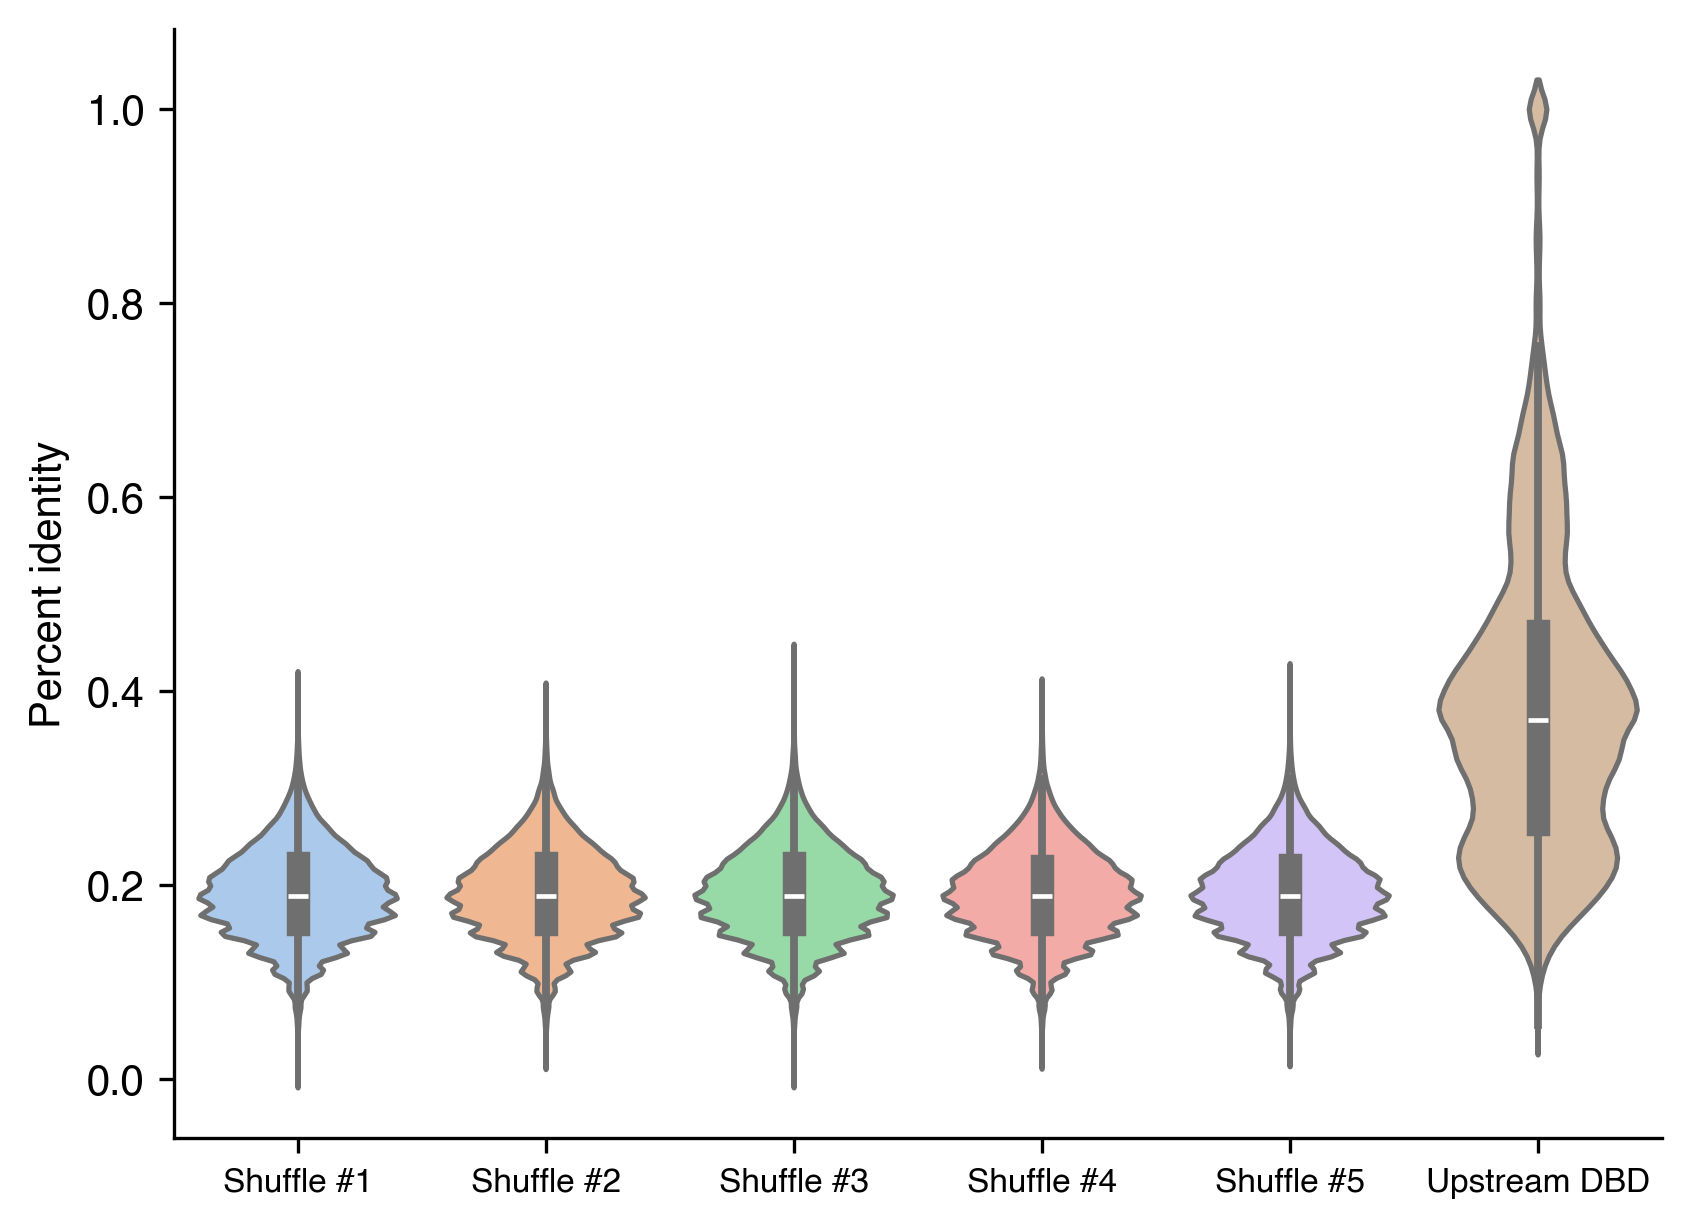

In [60]:
shuffle_1 = make_array_list(shuffle_identities_upstream[0])
shuffle_2 = make_array_list(shuffle_identities_upstream[1])
shuffle_3 = make_array_list(shuffle_identities_upstream[2])
shuffle_4 = make_array_list(shuffle_identities_upstream[3])
shuffle_5 = make_array_list(shuffle_identities_upstream[4])

upstream_ls = make_array_list(upstream_identity)

sns.violinplot([shuffle_1, shuffle_2, shuffle_3, shuffle_4, shuffle_5, upstream_ls])

plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels = ["Shuffle #1", "Shuffle #2", "Shuffle #3",  "Shuffle #4", "Shuffle #5", "Upstream DBD"], fontsize=8)
plt.ylabel("Percent identity")

sns.despine()
plt.savefig("../figures/conservation_plots/upstream_shuffles.pdf", format='pdf', bbox_inches='tight')